# Apartment rent prices in Graz

Data scrapped with webscraper.io from local advertisement website on 23 Aug 2020



## TODO
* calculate price difference between Graz and suburb
* Train a model for price prediction
    * Select features
    * Normalize features
    * Split train and test set
    * Write cost function and gradient descent algorithm manually
    * Use scikit for linear regression and compare it

## Data loading and initial check

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 16})

In [3]:
df = pd.read_csv('apartments.csv')

In [4]:
df.head()

,web-scraper-order,web-scraper-start-url,link,link-href,title,area,price,rooms,address,advertiser
0,1598196158-3038,https://www.willhaben.at/iad/immobilien/mietwo...,Graz Altstadt: Penthouse mit Schloßbergblick,https://www.willhaben.at/iad/immobilien/d/miet...,Graz Altstadt: Penthouse mit Schloßbergblick,264 m,"2.963,20",5 Zimmer,8010\n \n \n Graz,Hier Zuhause e.U.
1,1598196184-3971,https://www.willhaben.at/iad/immobilien/mietwo...,WOHNEN IN TOP LAGE *WALTENDORF*!! 2 SONNIGE BA...,https://www.willhaben.at/iad/immobilien/d/miet...,WOHNEN IN TOP LAGE *WALTENDORF*!! 2 SONNIGE BA...,100 m,"996,78",3 Zimmer,8042\n \n \n Graz,PW Projekt Wohnen
2,1598196105-1125,https://www.willhaben.at/iad/immobilien/mietwo...,"TOP WG-fähig! 3-Zimmer, 90m² Whg. mit Wohnküch...",https://www.willhaben.at/iad/immobilien/d/miet...,"TOP WG-fähig! 3-Zimmer, 90m² Whg. mit Wohnküch...",90 m,"700,-",3 Zimmer,8041\n \n \n Liebenau,Sutter Immobilien
3,1598196105-1175,https://www.willhaben.at/iad/immobilien/mietwo...,Single-Wohnung bei der TU - Petersgasse 15 - T...,https://www.willhaben.at/iad/immobilien/d/miet...,Single-Wohnung bei der TU - Petersgasse 15 - T...,21 m,"322,07",1 Zimmer,8010\n \n \n Graz,IVV Verkauf und Vermietungs GmbH
4,1598196172-3523,https://www.willhaben.at/iad/immobilien/mietwo...,NEUE 2 ZIMMER ERSTBEZUGSWOHNUNG IN DEN REINING...,https://www.willhaben.at/iad/immobilien/d/miet...,NEUE 2 ZIMMER ERSTBEZUGSWOHNUNG IN DEN REINING...,50 m,"671,-",2 Zimmer,8020\n \n \n Graz,teamneunzehn.at Immobilienmanagement GmbH & Co KG


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      3677 non-null   object
 1   web-scraper-start-url  3677 non-null   object
 2   link                   3677 non-null   object
 3   link-href              3677 non-null   object
 4   title                  3677 non-null   object
 5   area                   3662 non-null   object
 6   price                  3664 non-null   object
 7   rooms                  3569 non-null   object
 8   address                3677 non-null   object
 9   advertiser             3677 non-null   object
dtypes: object(10)
memory usage: 287.4+ KB


In [6]:
df.describe()

,web-scraper-order,web-scraper-start-url,link,link-href,title,area,price,rooms,address,advertiser
count,3677,3677,3677,3677,3677,3662,3664,3569,3677,3677
unique,3677,37,3294,3677,3294,151,2176,6,52,209
top,1598196113-1412,https://www.willhaben.at/iad/immobilien/mietwo...,Provisionsfreier Neubau,https://www.willhaben.at/iad/immobilien/d/miet...,Provisionsfreier Neubau,55 m,"699,-",2 Zimmer,8020\n \n \n Graz,Privat
freq,1,100,63,1,63,114,43,1766,1222,646


## Data cleanup and feature adding

### Dropping junk columns

In [7]:
drop_cols = ['web-scraper-order', 'web-scraper-start-url', 'link']

In [8]:
df.drop(drop_cols, axis=1, inplace=True)

In [9]:
df.head()

,link-href,title,area,price,rooms,address,advertiser
0,https://www.willhaben.at/iad/immobilien/d/miet...,Graz Altstadt: Penthouse mit Schloßbergblick,264 m,"2.963,20",5 Zimmer,8010\n \n \n Graz,Hier Zuhause e.U.
1,https://www.willhaben.at/iad/immobilien/d/miet...,WOHNEN IN TOP LAGE *WALTENDORF*!! 2 SONNIGE BA...,100 m,"996,78",3 Zimmer,8042\n \n \n Graz,PW Projekt Wohnen
2,https://www.willhaben.at/iad/immobilien/d/miet...,"TOP WG-fähig! 3-Zimmer, 90m² Whg. mit Wohnküch...",90 m,"700,-",3 Zimmer,8041\n \n \n Liebenau,Sutter Immobilien
3,https://www.willhaben.at/iad/immobilien/d/miet...,Single-Wohnung bei der TU - Petersgasse 15 - T...,21 m,"322,07",1 Zimmer,8010\n \n \n Graz,IVV Verkauf und Vermietungs GmbH
4,https://www.willhaben.at/iad/immobilien/d/miet...,NEUE 2 ZIMMER ERSTBEZUGSWOHNUNG IN DEN REINING...,50 m,"671,-",2 Zimmer,8020\n \n \n Graz,teamneunzehn.at Immobilienmanagement GmbH & Co KG


### Cleaning numerical columns area, price, rooms

In [10]:
area_cleaner = lambda area: str(area).replace(' m', '')
df.area = df.area.apply(area_cleaner).astype('float64')

In [11]:
df.head()

,link-href,title,area,price,rooms,address,advertiser
0,https://www.willhaben.at/iad/immobilien/d/miet...,Graz Altstadt: Penthouse mit Schloßbergblick,264.0,"2.963,20",5 Zimmer,8010\n \n \n Graz,Hier Zuhause e.U.
1,https://www.willhaben.at/iad/immobilien/d/miet...,WOHNEN IN TOP LAGE *WALTENDORF*!! 2 SONNIGE BA...,100.0,"996,78",3 Zimmer,8042\n \n \n Graz,PW Projekt Wohnen
2,https://www.willhaben.at/iad/immobilien/d/miet...,"TOP WG-fähig! 3-Zimmer, 90m² Whg. mit Wohnküch...",90.0,"700,-",3 Zimmer,8041\n \n \n Liebenau,Sutter Immobilien
3,https://www.willhaben.at/iad/immobilien/d/miet...,Single-Wohnung bei der TU - Petersgasse 15 - T...,21.0,"322,07",1 Zimmer,8010\n \n \n Graz,IVV Verkauf und Vermietungs GmbH
4,https://www.willhaben.at/iad/immobilien/d/miet...,NEUE 2 ZIMMER ERSTBEZUGSWOHNUNG IN DEN REINING...,50.0,"671,-",2 Zimmer,8020\n \n \n Graz,teamneunzehn.at Immobilienmanagement GmbH & Co KG


In [12]:
rooms_cleaner = lambda room: str(room).replace(' Zimmer', '')
df.rooms = df.rooms.apply(rooms_cleaner)

In [13]:
df = df[df.rooms != 'nan']

In [14]:
price_cleaner = lambda price: str(price).replace('-', '').replace('.','').replace(',','.')
df.price = df.price.apply(price_cleaner).astype('float64')

### Cleaning and extracting index and town from address

In [15]:
df['zip'] = df.address.apply(lambda x: x[0:4])

We have 2 ads with just 'Graz' address, so let's drop them

In [16]:
df = df[df['zip']!='Graz']

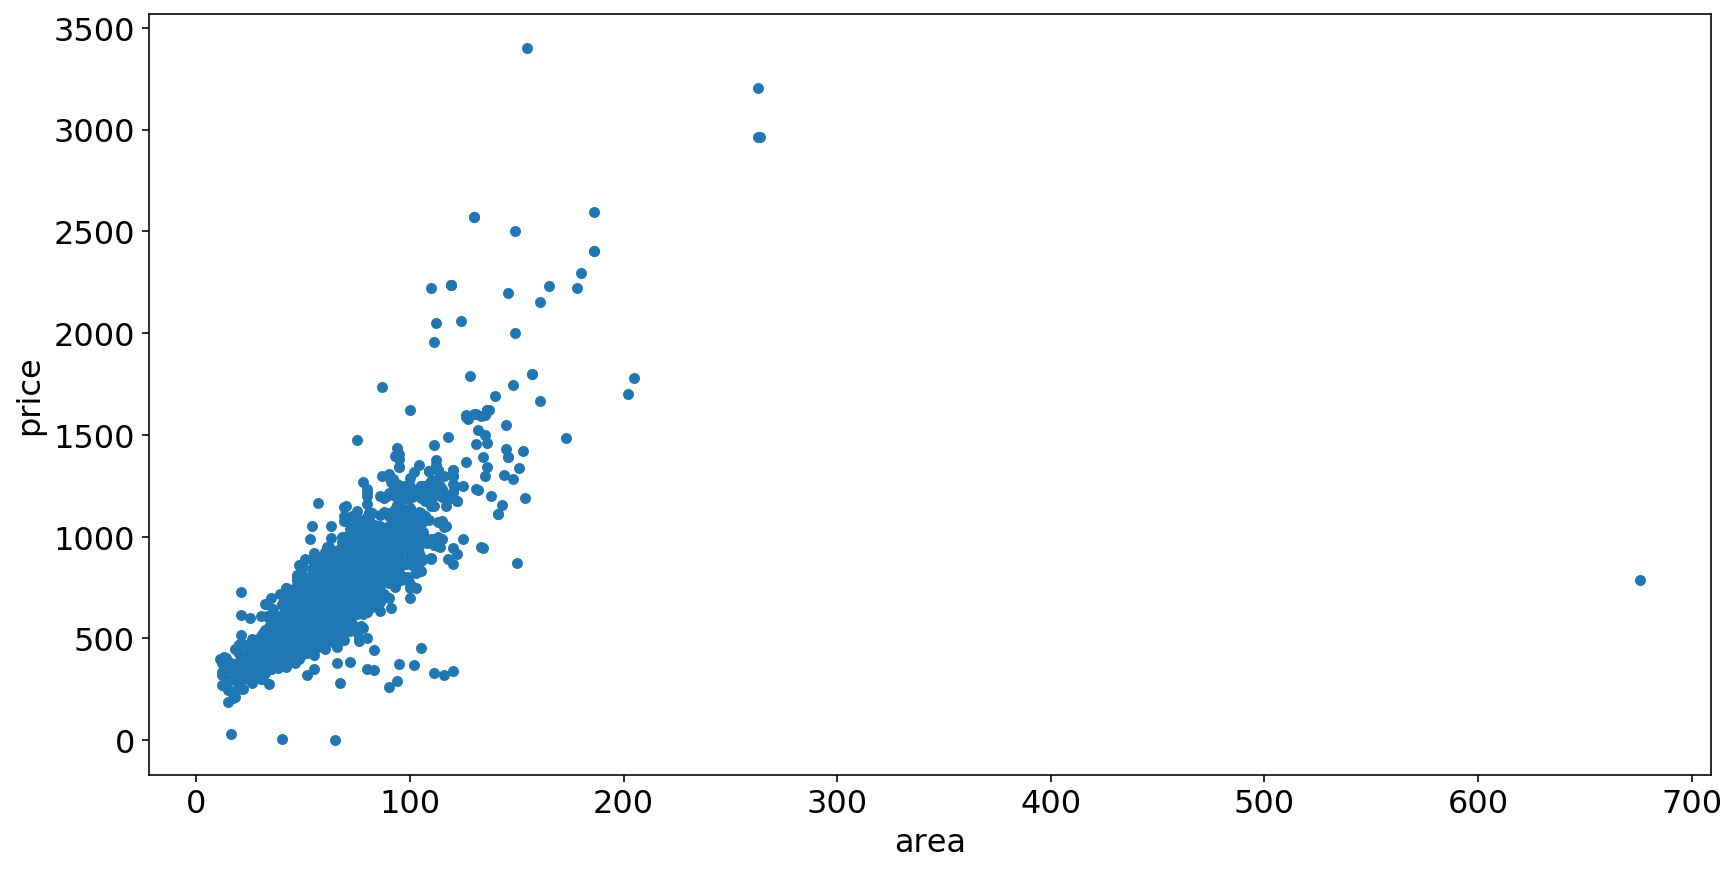

In [17]:
df.plot(kind='scatter', x='area', y='price', figsize=(14, 7));

In [18]:
df.zip.value_counts()

8020    1547
8010    1294
8041     106
8053      97
8042      83
8054      83
8055      80
8051      67
8045      66
8052      54
8043      39
8047      30
8044      16
8046       3
8073       2
Name: zip, dtype: int64

### Extracting district or town from the address string

In [19]:
df['district'] = df.address.apply(lambda x: ' '.join(x[5:].split()))

We don't need address and title column anymore

In [20]:
df.drop(['address', 'title'], axis=1, inplace=True)

### Changing advertiser column to two options: "private" and "company"

In [21]:
df.advertiser.value_counts()

Privat                                               613
teamneunzehn.at Immobilienmanagement GmbH & Co KG    304
Wesiak Gesellschaft m.b.H.                           141
C&P Immobilien AG                                    132
Gewerblicher Anbieter                                117
                                                    ... 
Kanzlei Harald Altenbacher e.U.                        1
KETAT GrundstücksverwertungsgmbH.                      1
Donau Immobilien Mag. Thomas Fürstl GmbH & Co KG       1
Dr. Helmut Marko                                       1
Kasper Immobilien GmbH                                 1
Name: advertiser, Length: 204, dtype: int64

In [22]:
df['is_private'] = np.where(df['advertiser'] == 'Privat', True, False)
df.is_private.value_counts()

False    2954
True      613
Name: is_private, dtype: int64

### Removing ads with price <100 euro

In [23]:
df[df.price<100].count()[0]

3

In [24]:
df = df[df.price>=100]

## Exploratory data analysis

In [25]:
df.head(10)

,link-href,area,price,rooms,advertiser,zip,district,is_private
0,https://www.willhaben.at/iad/immobilien/d/miet...,264.0,2963.20,5,Hier Zuhause e.U.,8010,Graz,False
1,https://www.willhaben.at/iad/immobilien/d/miet...,100.0,996.78,3,PW Projekt Wohnen,8042,Graz,False
2,https://www.willhaben.at/iad/immobilien/d/miet...,90.0,700.00,3,Sutter Immobilien,8041,Liebenau,False
3,https://www.willhaben.at/iad/immobilien/d/miet...,21.0,322.07,1,IVV Verkauf und Vermietungs GmbH,8010,Graz,False
4,https://www.willhaben.at/iad/immobilien/d/miet...,50.0,671.00,2,teamneunzehn.at Immobilienmanagement GmbH & Co KG,8020,Graz,False
5,https://www.willhaben.at/iad/immobilien/d/miet...,103.0,749.00,3,Immobilien Huber,8020,Graz,False
6,https://www.willhaben.at/iad/immobilien/d/miet...,71.0,668.63,2,Wesiak Gesellschaft m.b.H.,8020,Graz,False
7,https://www.willhaben.at/iad/immobilien/d/miet...,45.0,499.00,1,RIOG Rudolf Immobilien OG,8041,Graz,False
8,https://www.willhaben.at/iad/immobilien/d/miet...,34.0,380.59,1,GGW Gemeinn. Grazer Wohnungsgenossenschaft mbH,8042,Graz,False
9,https://www.willhaben.at/iad/immobilien/d/miet...,53.0,545.00,2,Privat,8010,Graz,True


Let's find outliers and drop them as non-relevant

### Area distribution

/opt/miniconda3/envs/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


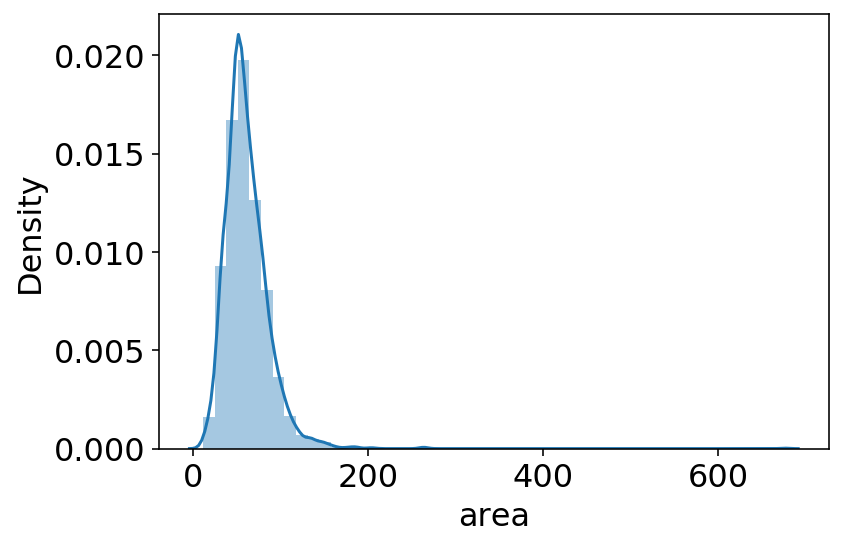

In [26]:
sns.distplot(df.area);

In [27]:
df.describe()

,area,price
count,3545.000000,3553.000000
mean,61.118759,712.785877
std,26.175830,262.898365
min,11.000000,190.000000
25%,46.000000,550.000000
50%,57.000000,675.000000
75%,73.000000,820.560000
max,676.000000,3400.000000


/opt/miniconda3/envs/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


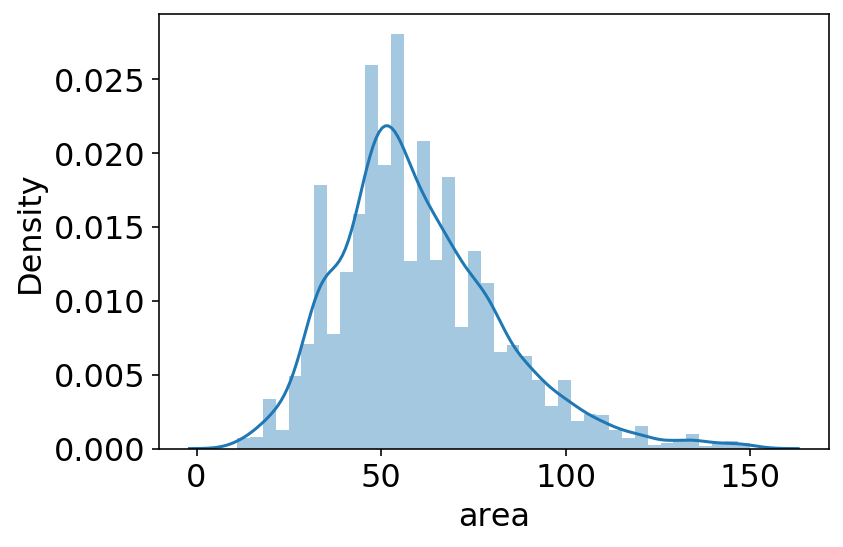

In [28]:
sns.distplot(df[df['area'] <= 150].area);

We will remove all flats with area more than 150 square meters (less than 1% of all ads)

In [29]:
df[df['area'] <= 150].count()/df.count()

link-href     0.991838
area          0.994076
price         0.991838
rooms         0.991838
advertiser    0.991838
zip           0.991838
district      0.991838
is_private    0.991838
dtype: float64

In [30]:
df = df[df['area'] <= 150]

### Room number distribution

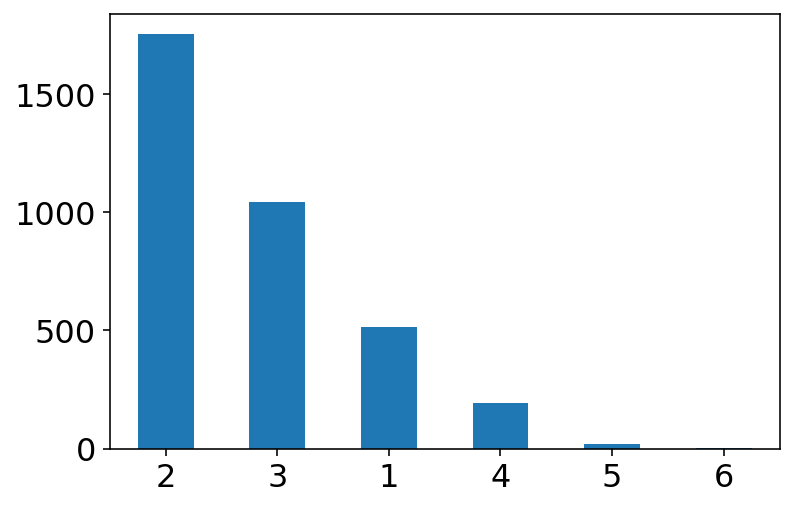

In [31]:
df['rooms'].value_counts().plot(kind="bar");
plt.xticks(rotation='horizontal');

In [32]:
df.rooms.value_counts(normalize=True)

2    0.497446
3    0.295970
1    0.145857
4    0.054484
5    0.005959
6    0.000284
Name: rooms, dtype: float64

Let's merge 4, 5, 6 samples as 4+ category

In [33]:
df[df['rooms'].astype(int) >= 4].rooms
df.loc[df['rooms'].astype(int) >= 4, "rooms"] = '4+'

In [34]:
df.rooms.value_counts().sort_index()

1      514
2     1753
3     1043
4+     214
Name: rooms, dtype: int64

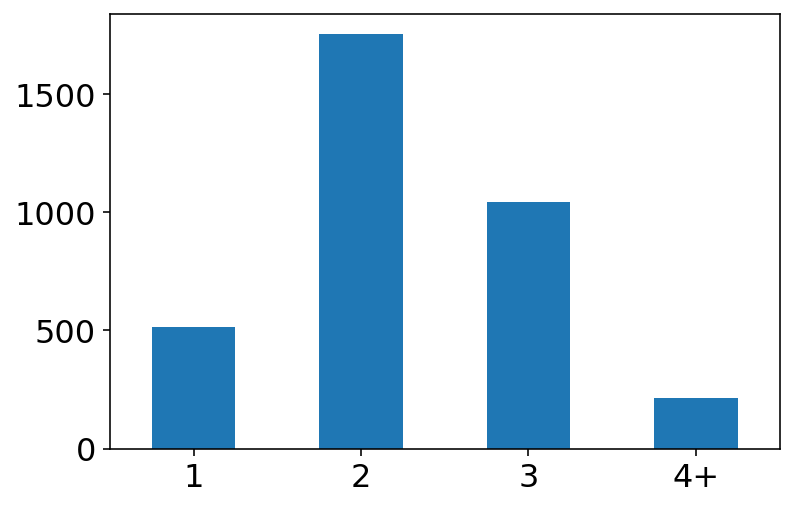

In [35]:
df['rooms'].value_counts().sort_index().plot.bar();
plt.xticks(rotation='horizontal');

### Price distribution

In [36]:
df.price.quantile([0.99, 1])

0.99    1446.5615
1.00    2568.7600
Name: price, dtype: float64

Seems that less than 1% of flats cost more than 1500 euro per month. Let's drop them

In [37]:
luxury = df.price>1500

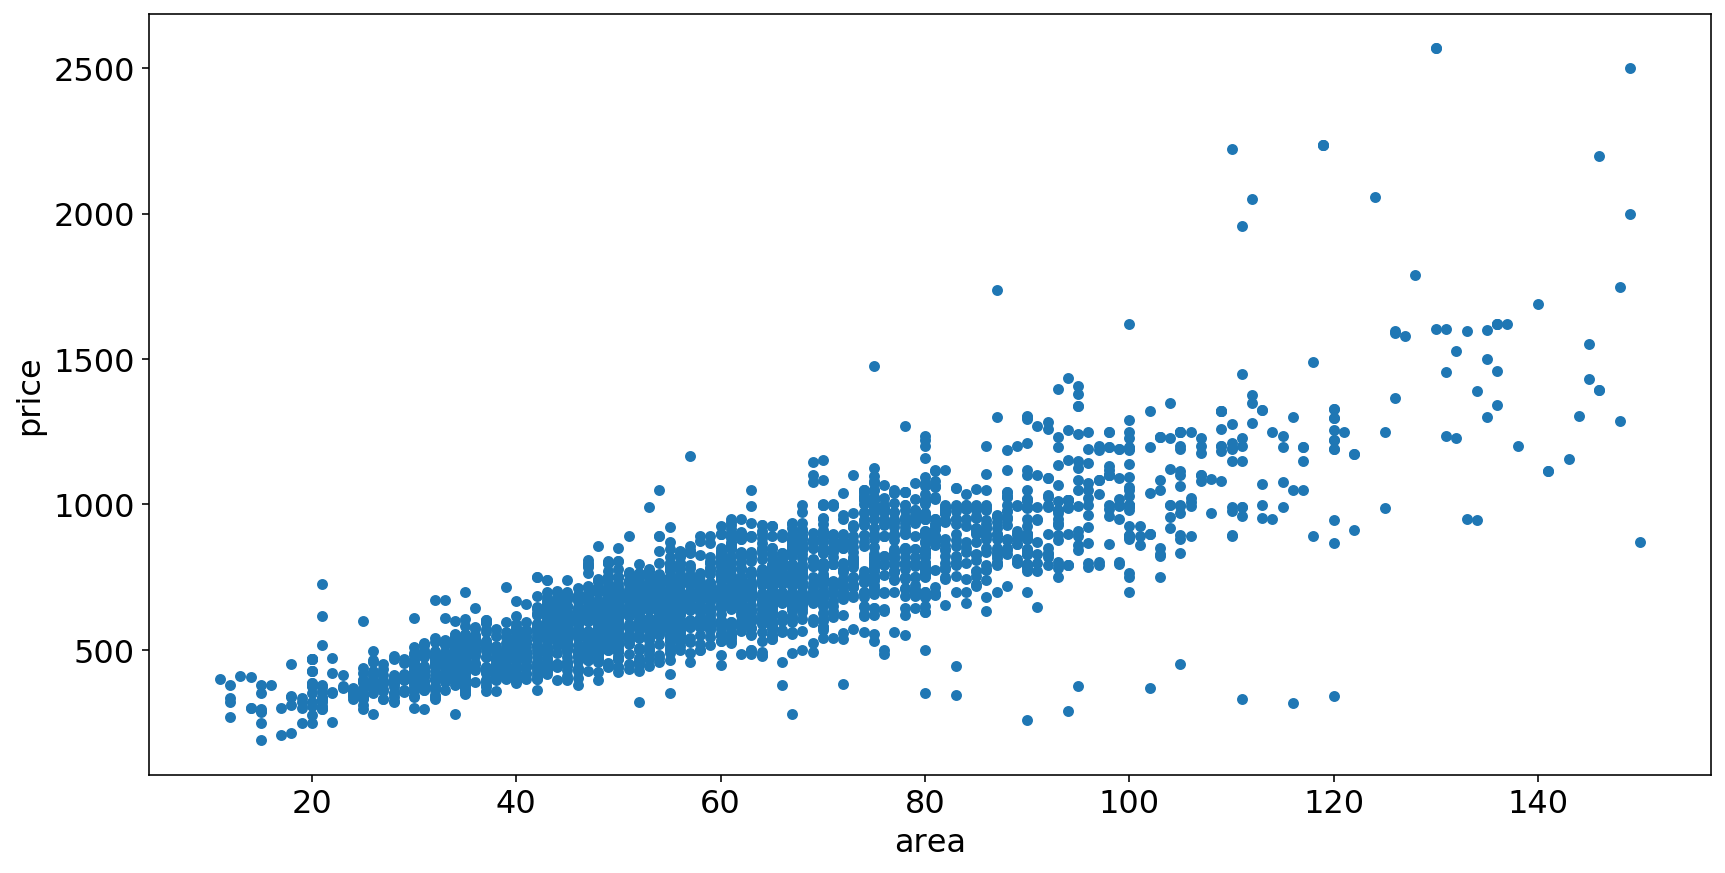

In [38]:
df.plot(kind='scatter', x='area', y='price', figsize=(14, 7));

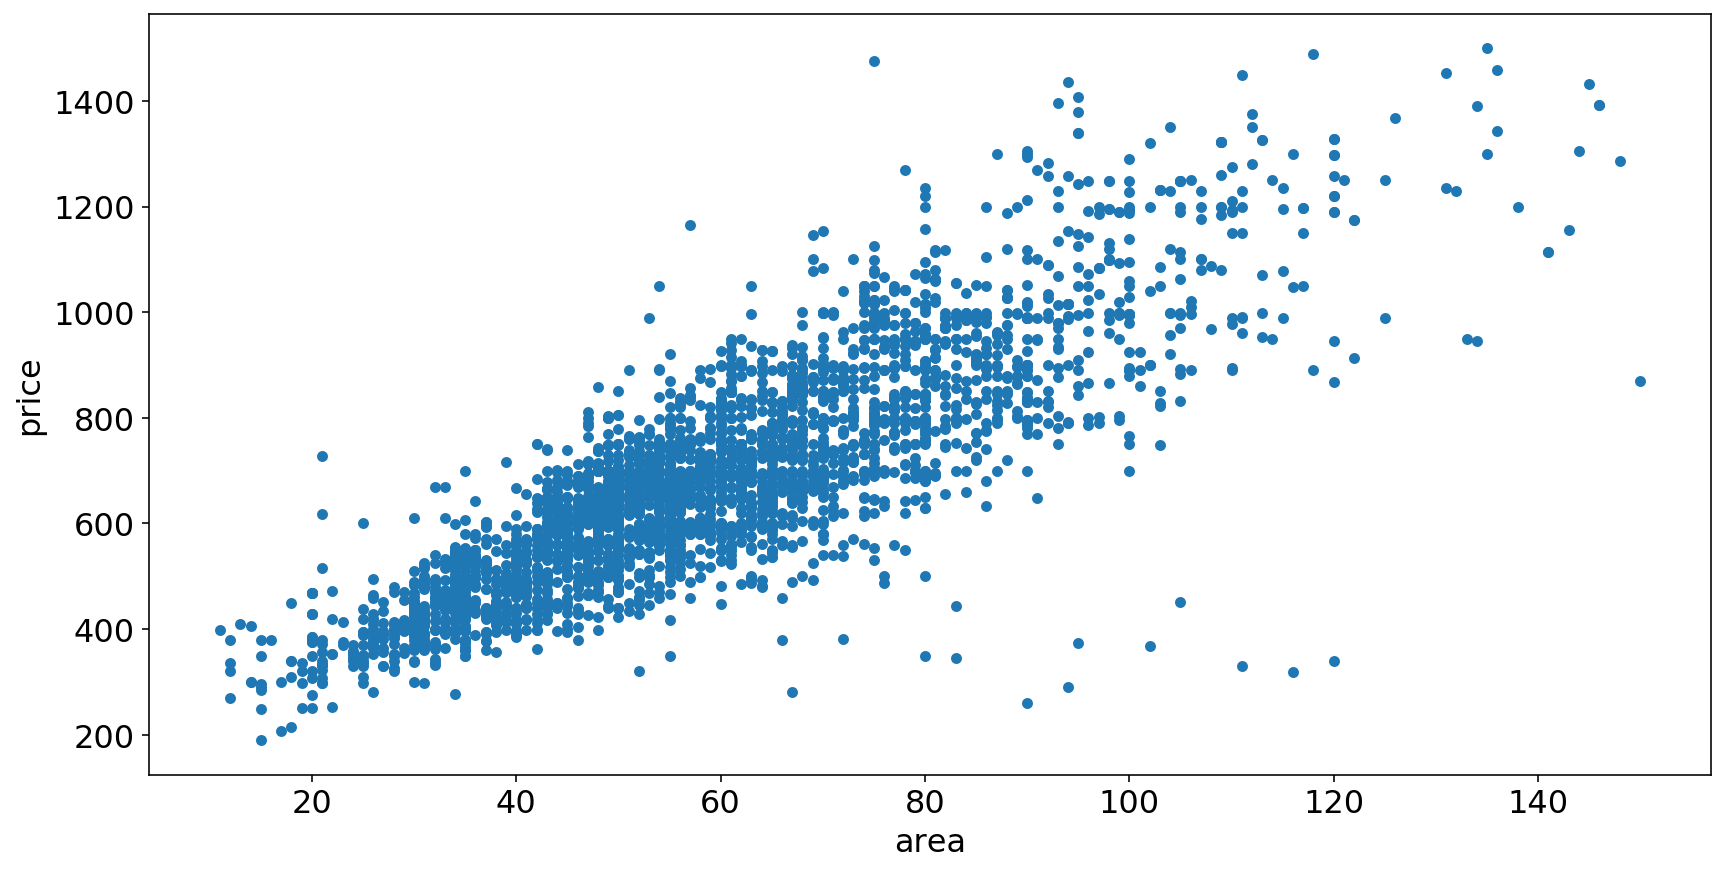

In [39]:
df[~luxury].plot(kind='scatter', x='area', y='price', figsize=(14, 7));

In [40]:
df = df[~luxury]

<Figure size 1440x1440 with 0 Axes>

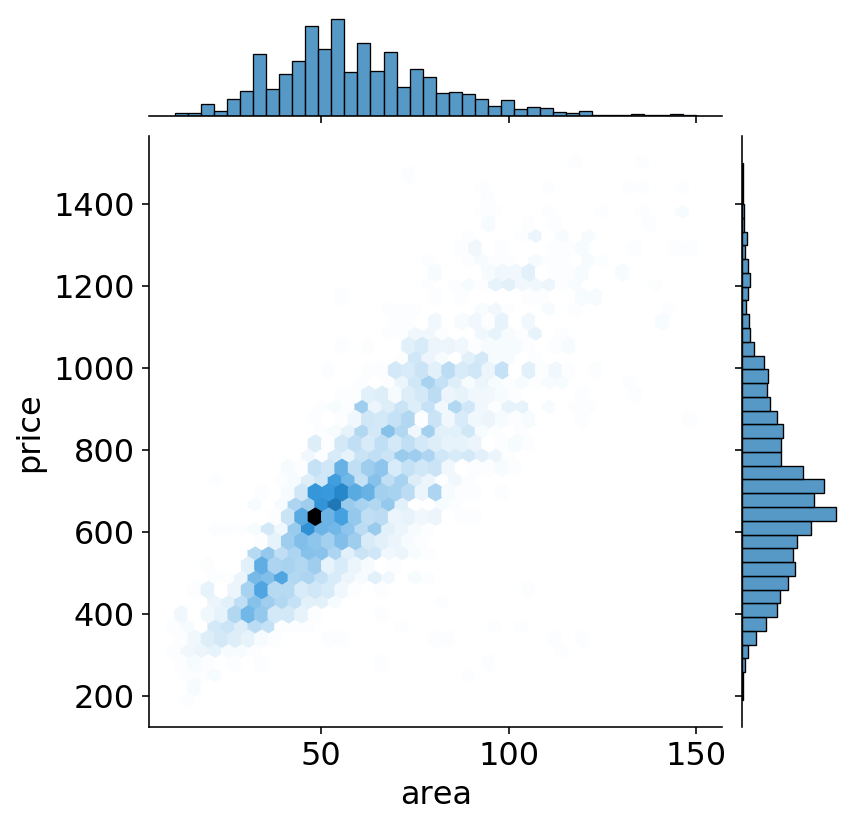

In [41]:
plt.figure(figsize=(20,20));
ax = sns.jointplot(kind='hex', data=df, x='area', y='price');

### District comparison
[Graz – PLZ Suche Österreich](https://www.plz-suche.org/graz-at72ca)

In [42]:
df.zip.value_counts()

8020    1537
8010    1240
8041     104
8053      97
8054      83
8042      80
8055      79
8051      67
8045      65
8052      54
8043      39
8047      29
8044      15
8046       3
8073       2
Name: zip, dtype: int64

Let's drop 8073 and 8046 zips

In [43]:
df = df[~df.zip.isin(['8073', '8046'])]

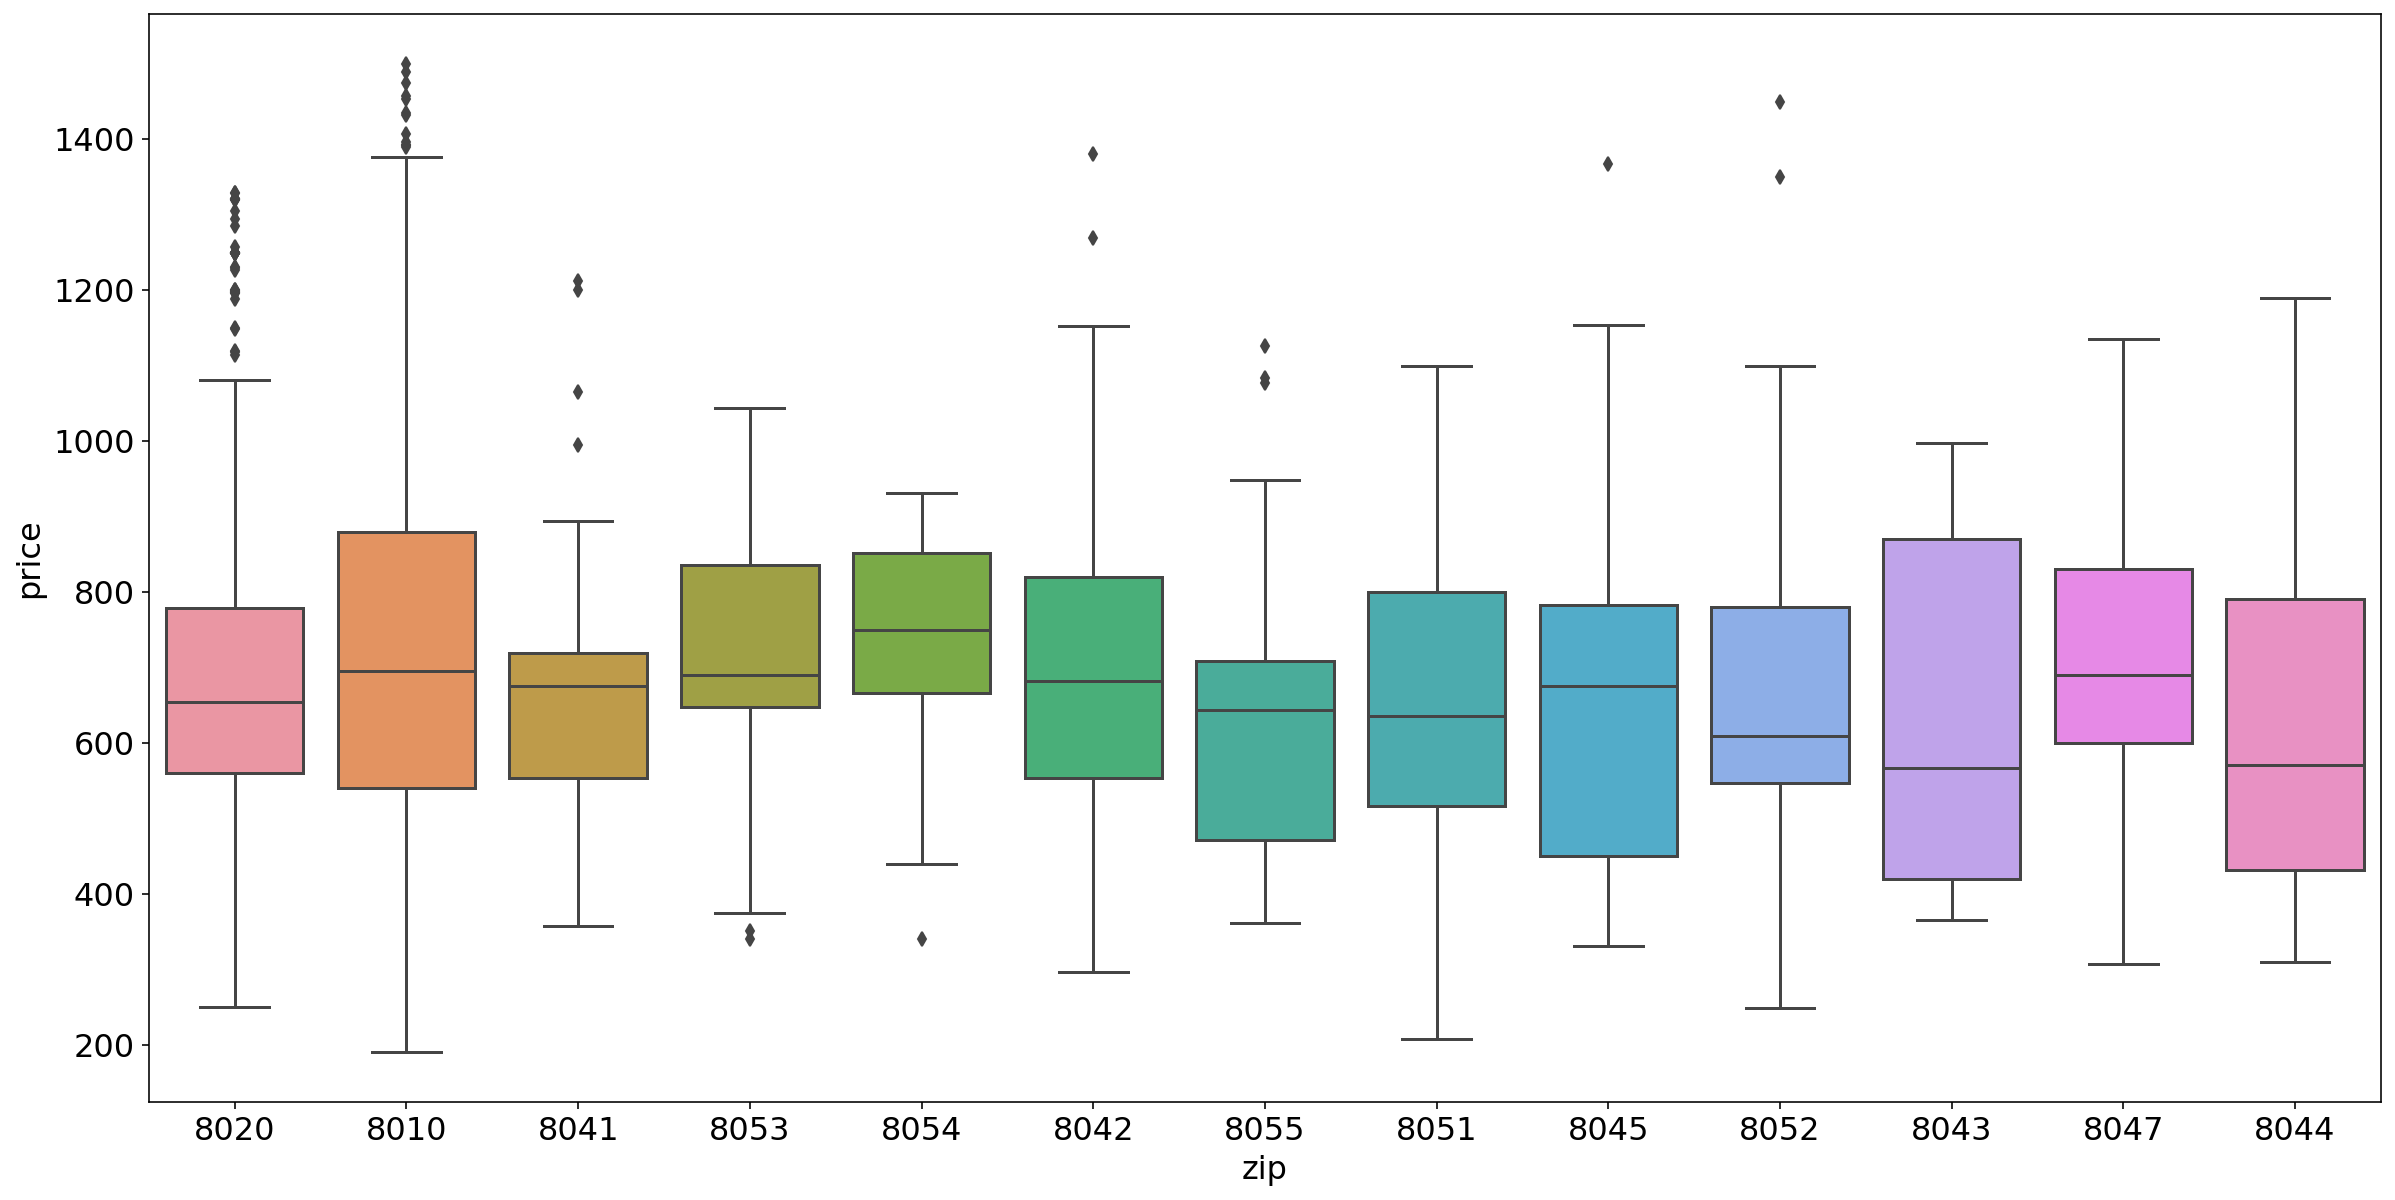

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(x='zip', y='price', data=df, order=df.zip.value_counts(ascending=False).index);

In [45]:
pd.pivot_table(data=df, index='rooms', columns='zip',values='price')

zip,8010,8020,8041,8042,8043,8044,8045,8047,8051,8052,8053,8054,8055
rooms,,,,,,,,,,,,,
1,452.926653,460.567451,458.687727,450.731176,404.246923,425.735000,449.383529,385.230000,394.303846,409.473333,386.666667,542.742500,424.279333
2,661.045370,623.138189,659.281042,664.807179,585.546667,572.870000,671.767941,651.065333,605.224074,609.517500,633.582766,654.897568,592.888378
3,878.707814,831.152106,748.346563,874.055909,839.940909,751.666667,869.991818,864.454545,817.406364,842.139412,823.405319,834.771471,778.784400
4+,1084.318241,1077.478269,1103.605000,910.790000,949.333333,1009.600000,1200.396667,NaN,856.436000,872.492500,NaN,792.906250,860.000000


In [46]:
pd.set_option('display.max_colwidth', None)
df[(df.price<720) & (df.rooms=='2') & (df.price>680) & (df.zip=='8010')]['link-href']

13                                                                                         https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/top-2-zimmer-altbauwohnung-392472716/
21                                                                  https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/ruhige-single-paerchen-wohnung-nahe-jakominiplatz-399198035/
72                                                        https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/provisionsfreie-2-zimmerwohnung-ueber-den-daechern-von-graz-400181928/
130                                                                         https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/sonnige-ruhige-2-zimmerwohnung-von-privat-400678298/
157                                                https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/sensationeller-blick-ueber-graz-schoene-2-zimmerwohnung-waltendorf-377141

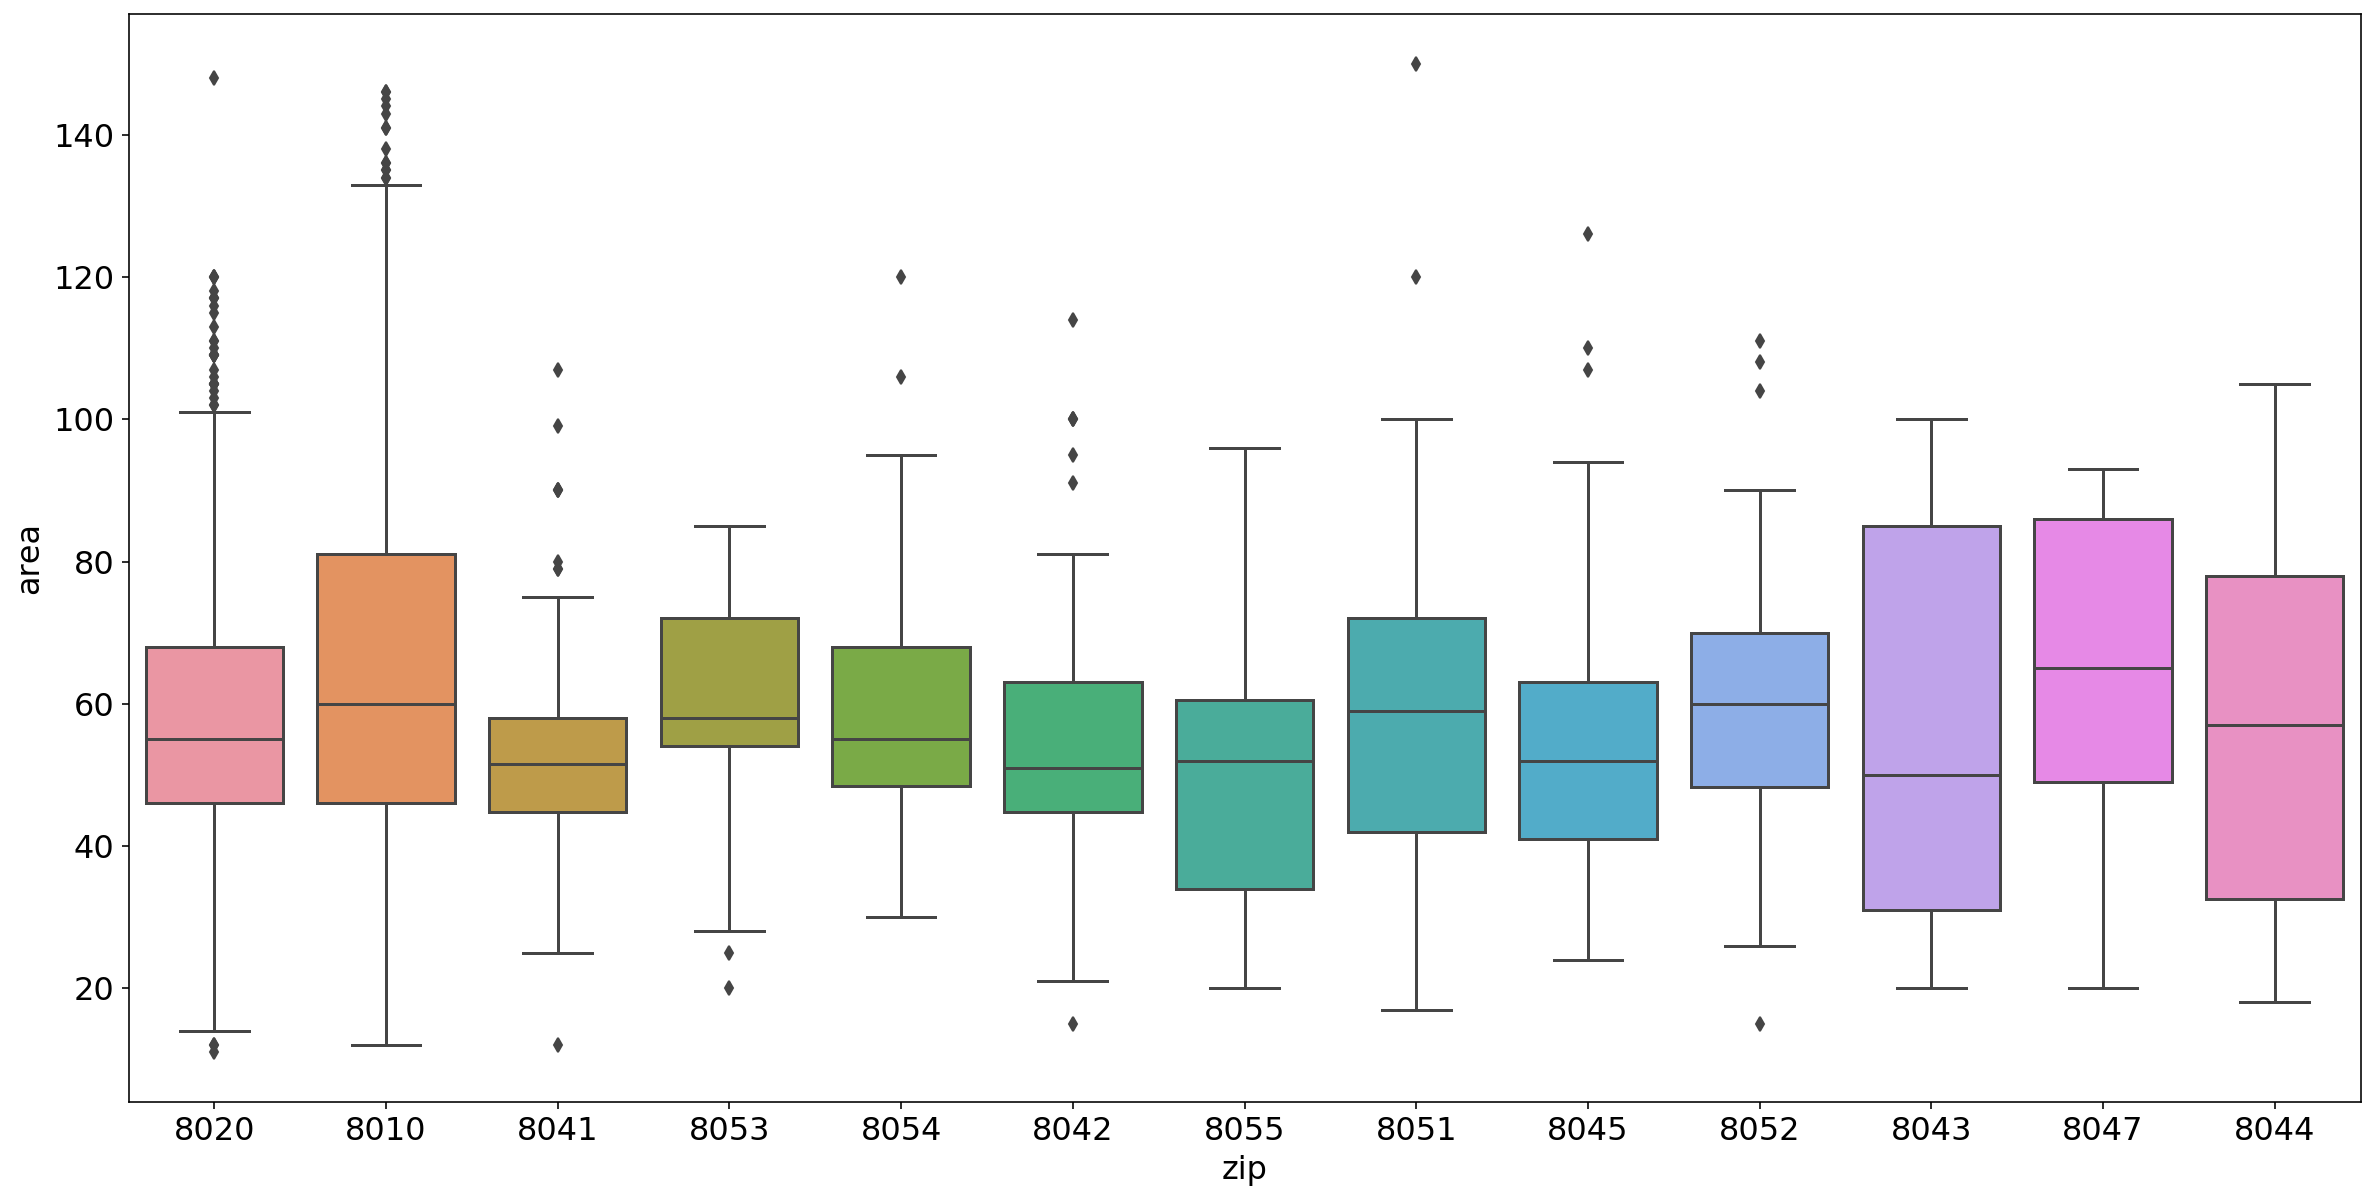

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x='zip', y='area', data=df, order=df.zip.value_counts(ascending=False).index);

#### Is it more expensive to live in the center?
Assume that 8010 is the center, all others outskirts

In [48]:
outskirts = set(df.zip.value_counts().index)
outskirts.remove('8010')

In [49]:
df['center'] = np.where(df['zip'].isin(outskirts), False, True)

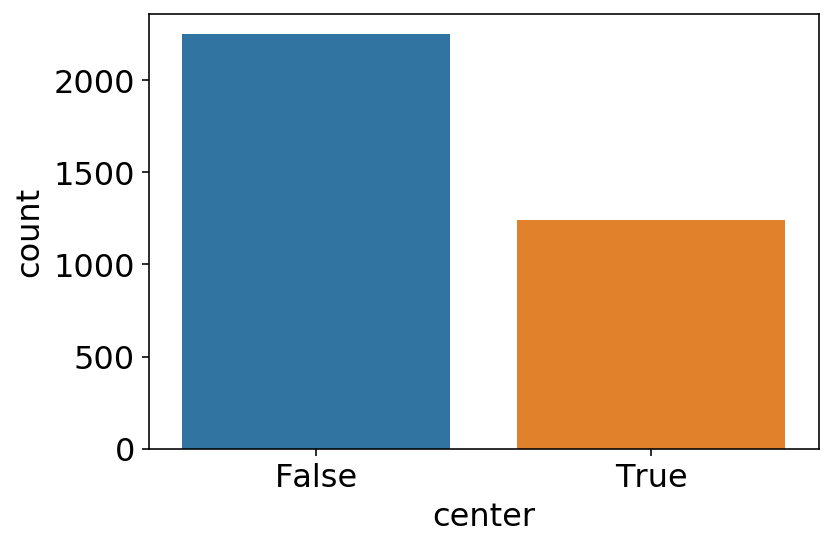

In [50]:
sns.countplot(x='center', data=df);

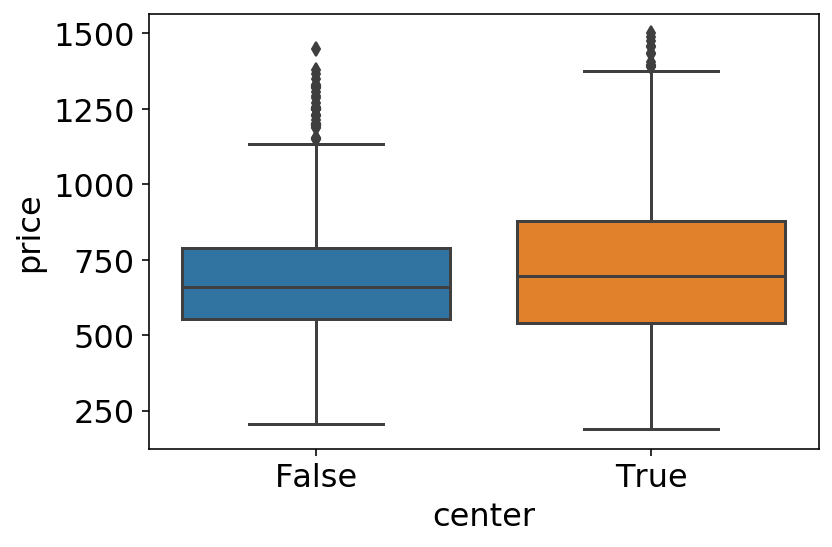

In [51]:
sns.boxplot(x='center', y='price', data=df);

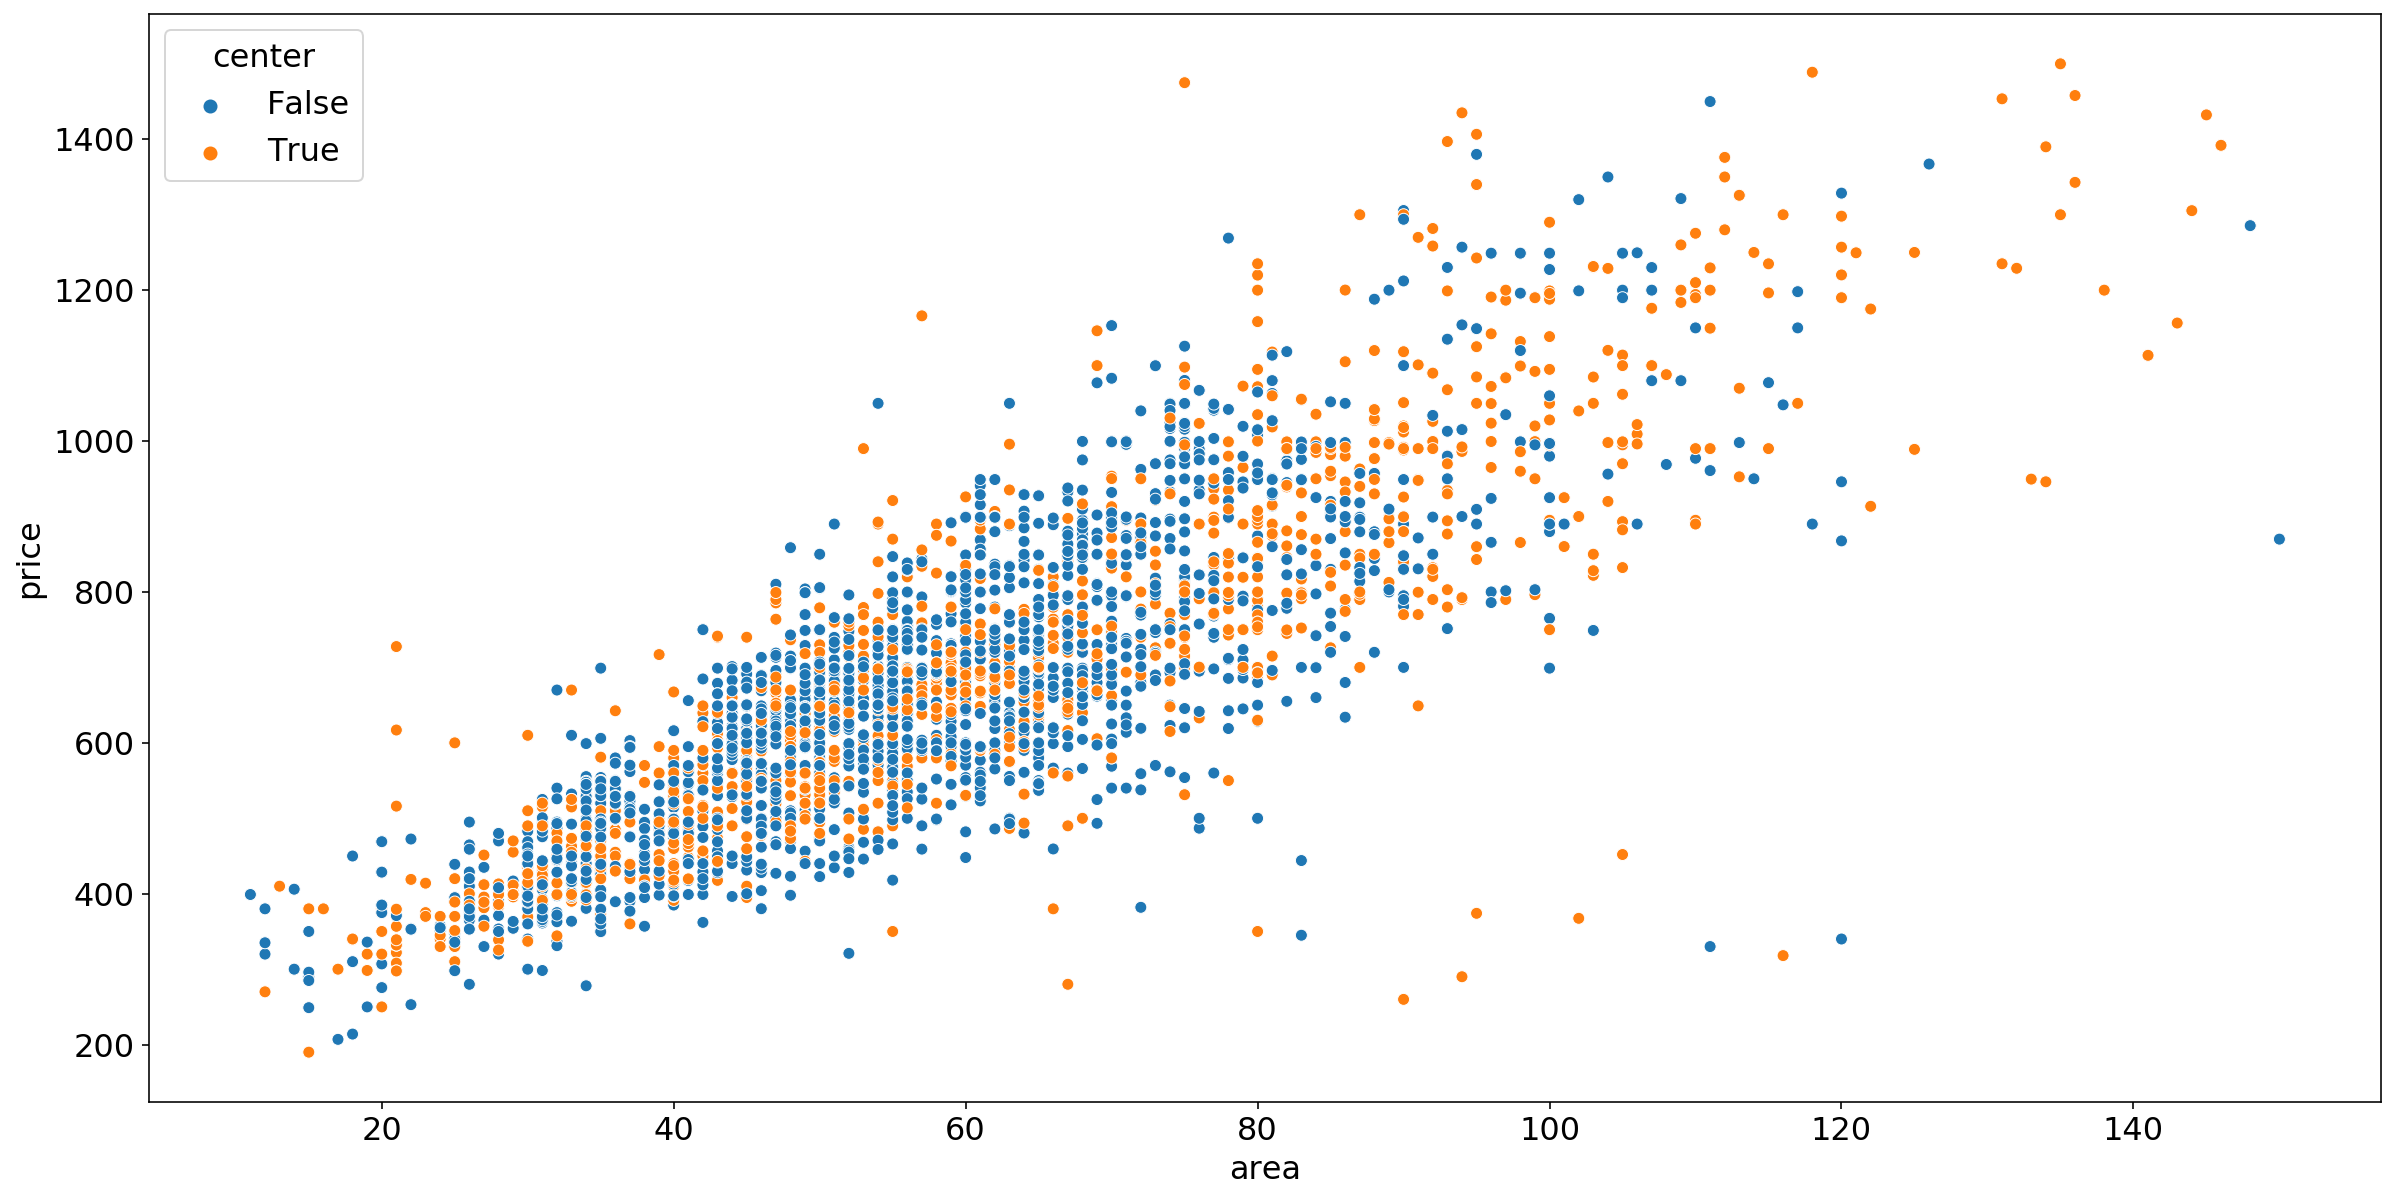

In [52]:
plt.figure(figsize=(20,10));
sns.scatterplot(x='area', y='price', hue='center', data=df);

### Room number effect on price

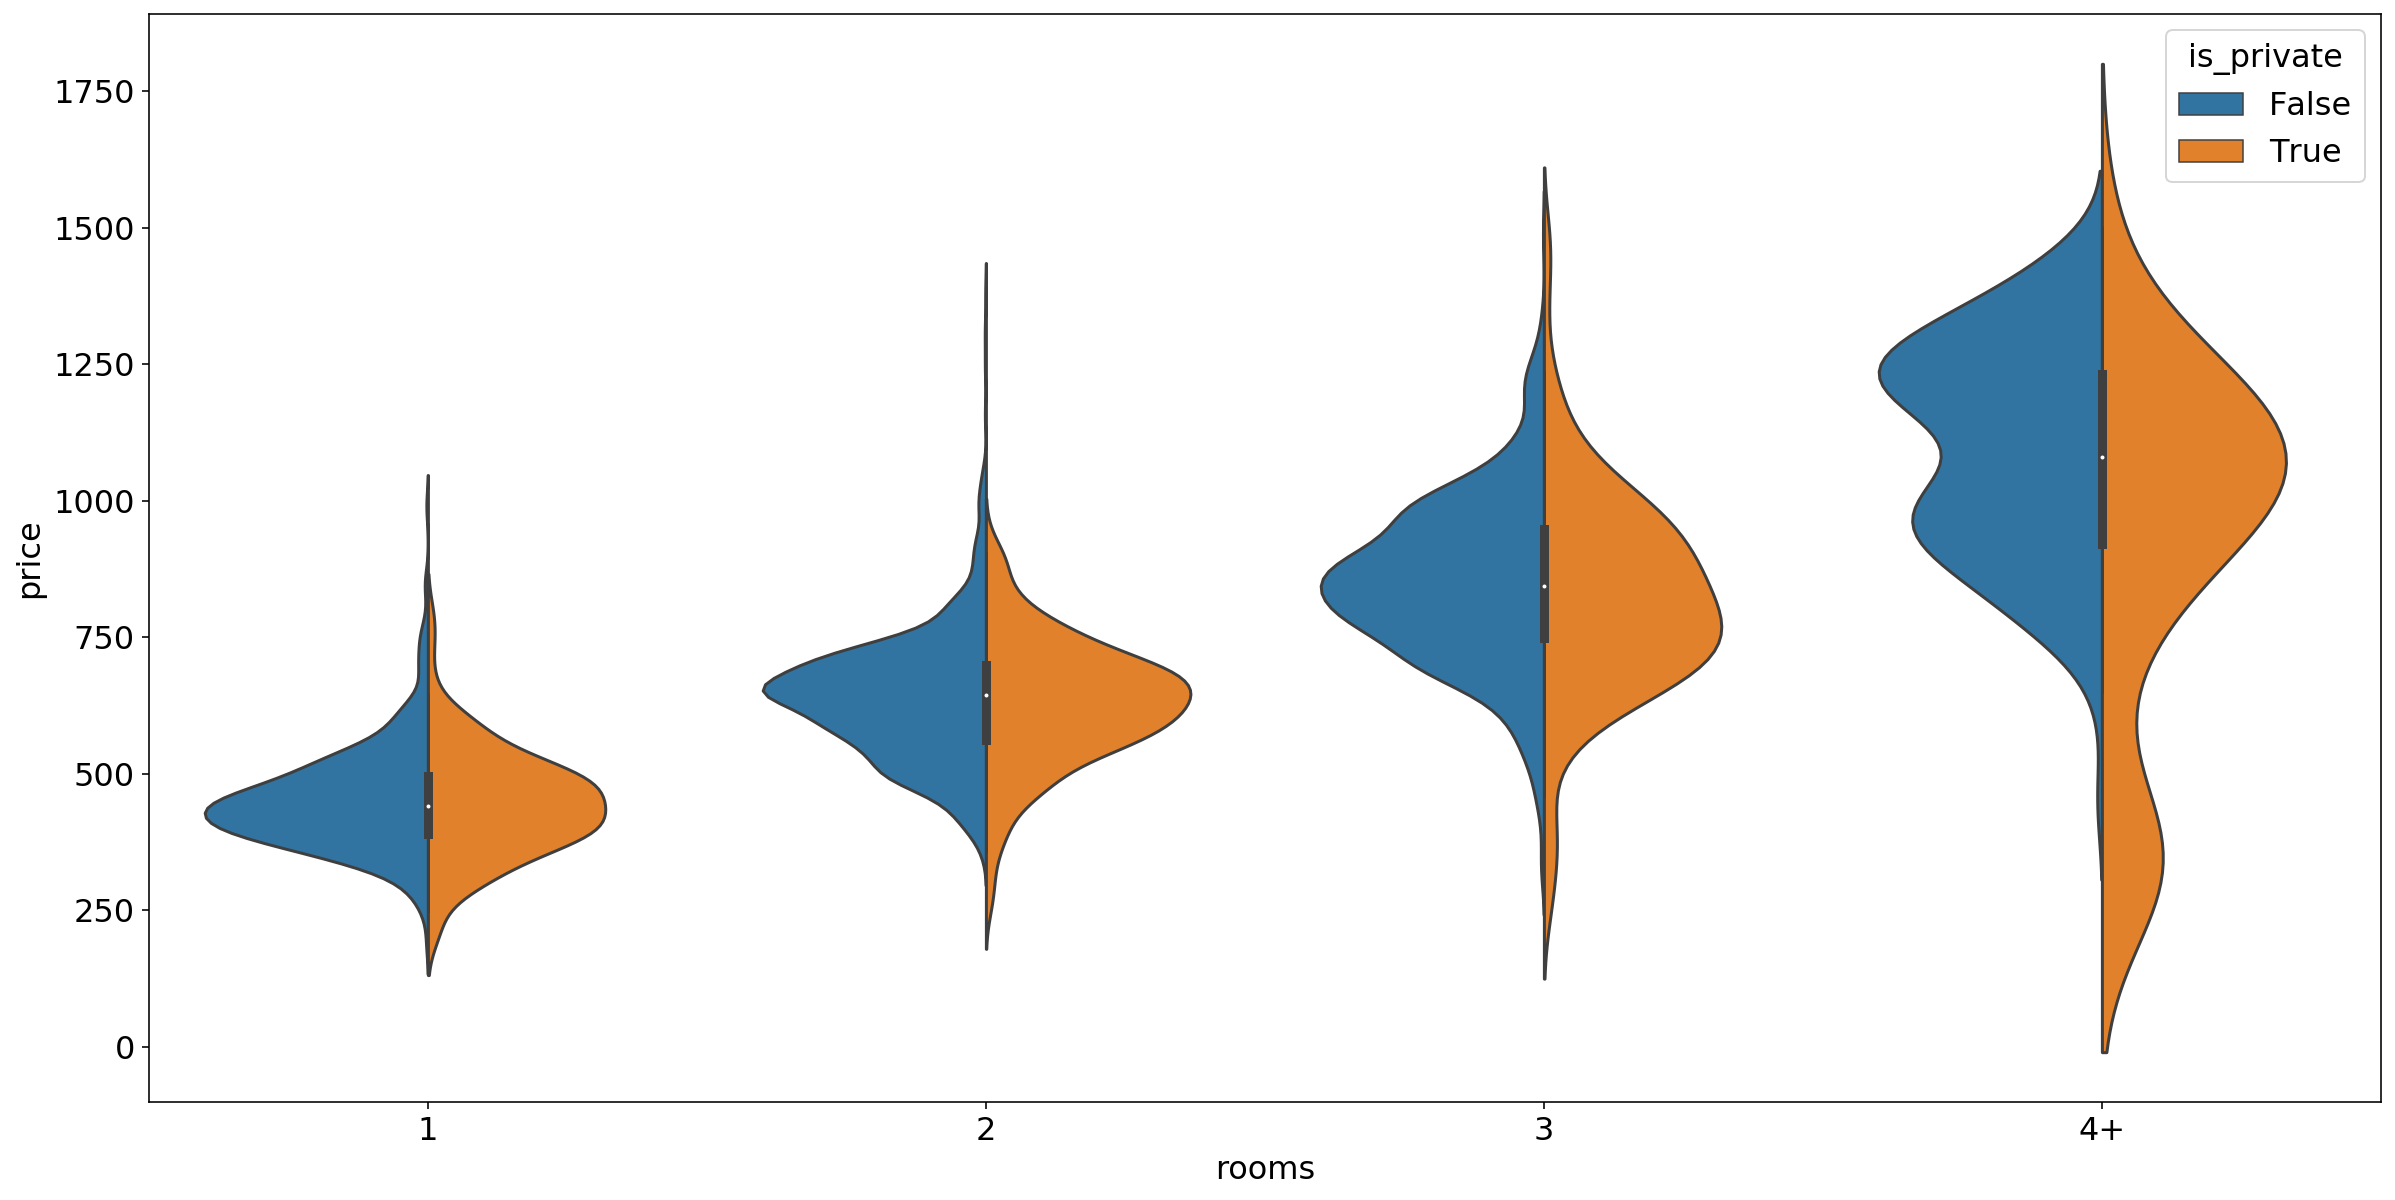

In [53]:
plt.figure(figsize=(20,10))
sns.violinplot(x='rooms', y='price', hue='is_private', split=True, data=df, order=df.rooms.value_counts().sort_index().index);

Seems that there are a lot of big apartments which cost less than 600 euro! Let's check them

In [54]:
pd.set_option('display.max_colwidth', None)
df[(df.price<600) & (df.rooms=='4+')]['link-href']

58      https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/sonniges-schoenes-moebliertes-12-m-zimmer-in-wohnung-mit-balkon-gemeinschaftszimmer-2x-wc-bad-keller-etc-401961257/
506                                                                                https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/wg-zimmer-bei-meduni-lkh-graz-398718244/
1620                                                                       https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/wg-zimmer-in-graz-eggenberg-ab-sofort-397856147/
1796                                                                          https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/geidorf-4-zimmer-getrennt-begehbar-401226120/
1878                                             https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/nachmieter-fuer-zimmer-in-3er-wg-gesucht-naehe-innenstadt-14-qm-398942875/
2311                

Almost all of them are only rooms in 4+ apartment. There is another tail in 3 room flats

In [55]:
df[(df.price<450) & (df.rooms=='3')]['link-href']

776                                                                  https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/20m2-wg-zimmer-bei-tu-398176568/
847                               https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/freies-zimmer-in-einer-studenten-wg-ab-sofort-verfuegbar-399623135/
973                                   https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/grosszuegige-wg-zimmer-in-3-zimmerwohnung-im-gruenen-388276400/
1069                                         https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/mitbewohnerin-fuer-gemuetliche-2er-wg-gesucht-399445864/
1161                 https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/naehe-kaerntnerstrasse-83-m-einzeln-begehbare-3-zimmer-wohnung-balkon-269408822/
1455                                          https://www.willhaben.at/iad/immobilien/d/mietwohnungen/steiermark/graz/tolle-2er-wg

In [56]:
pd.set_option('display.max_colwidth', 50)

Indeed, 4+ rooms for less than 500 and 3 room apartments for less than 450 is impossible. So let's drop them from our analysis.

In [57]:
shared_rooms = ((df.price<450) & (df.rooms=='3')) | ((df.price<600) & (df.rooms=='4+'))
df = df[~shared_rooms]

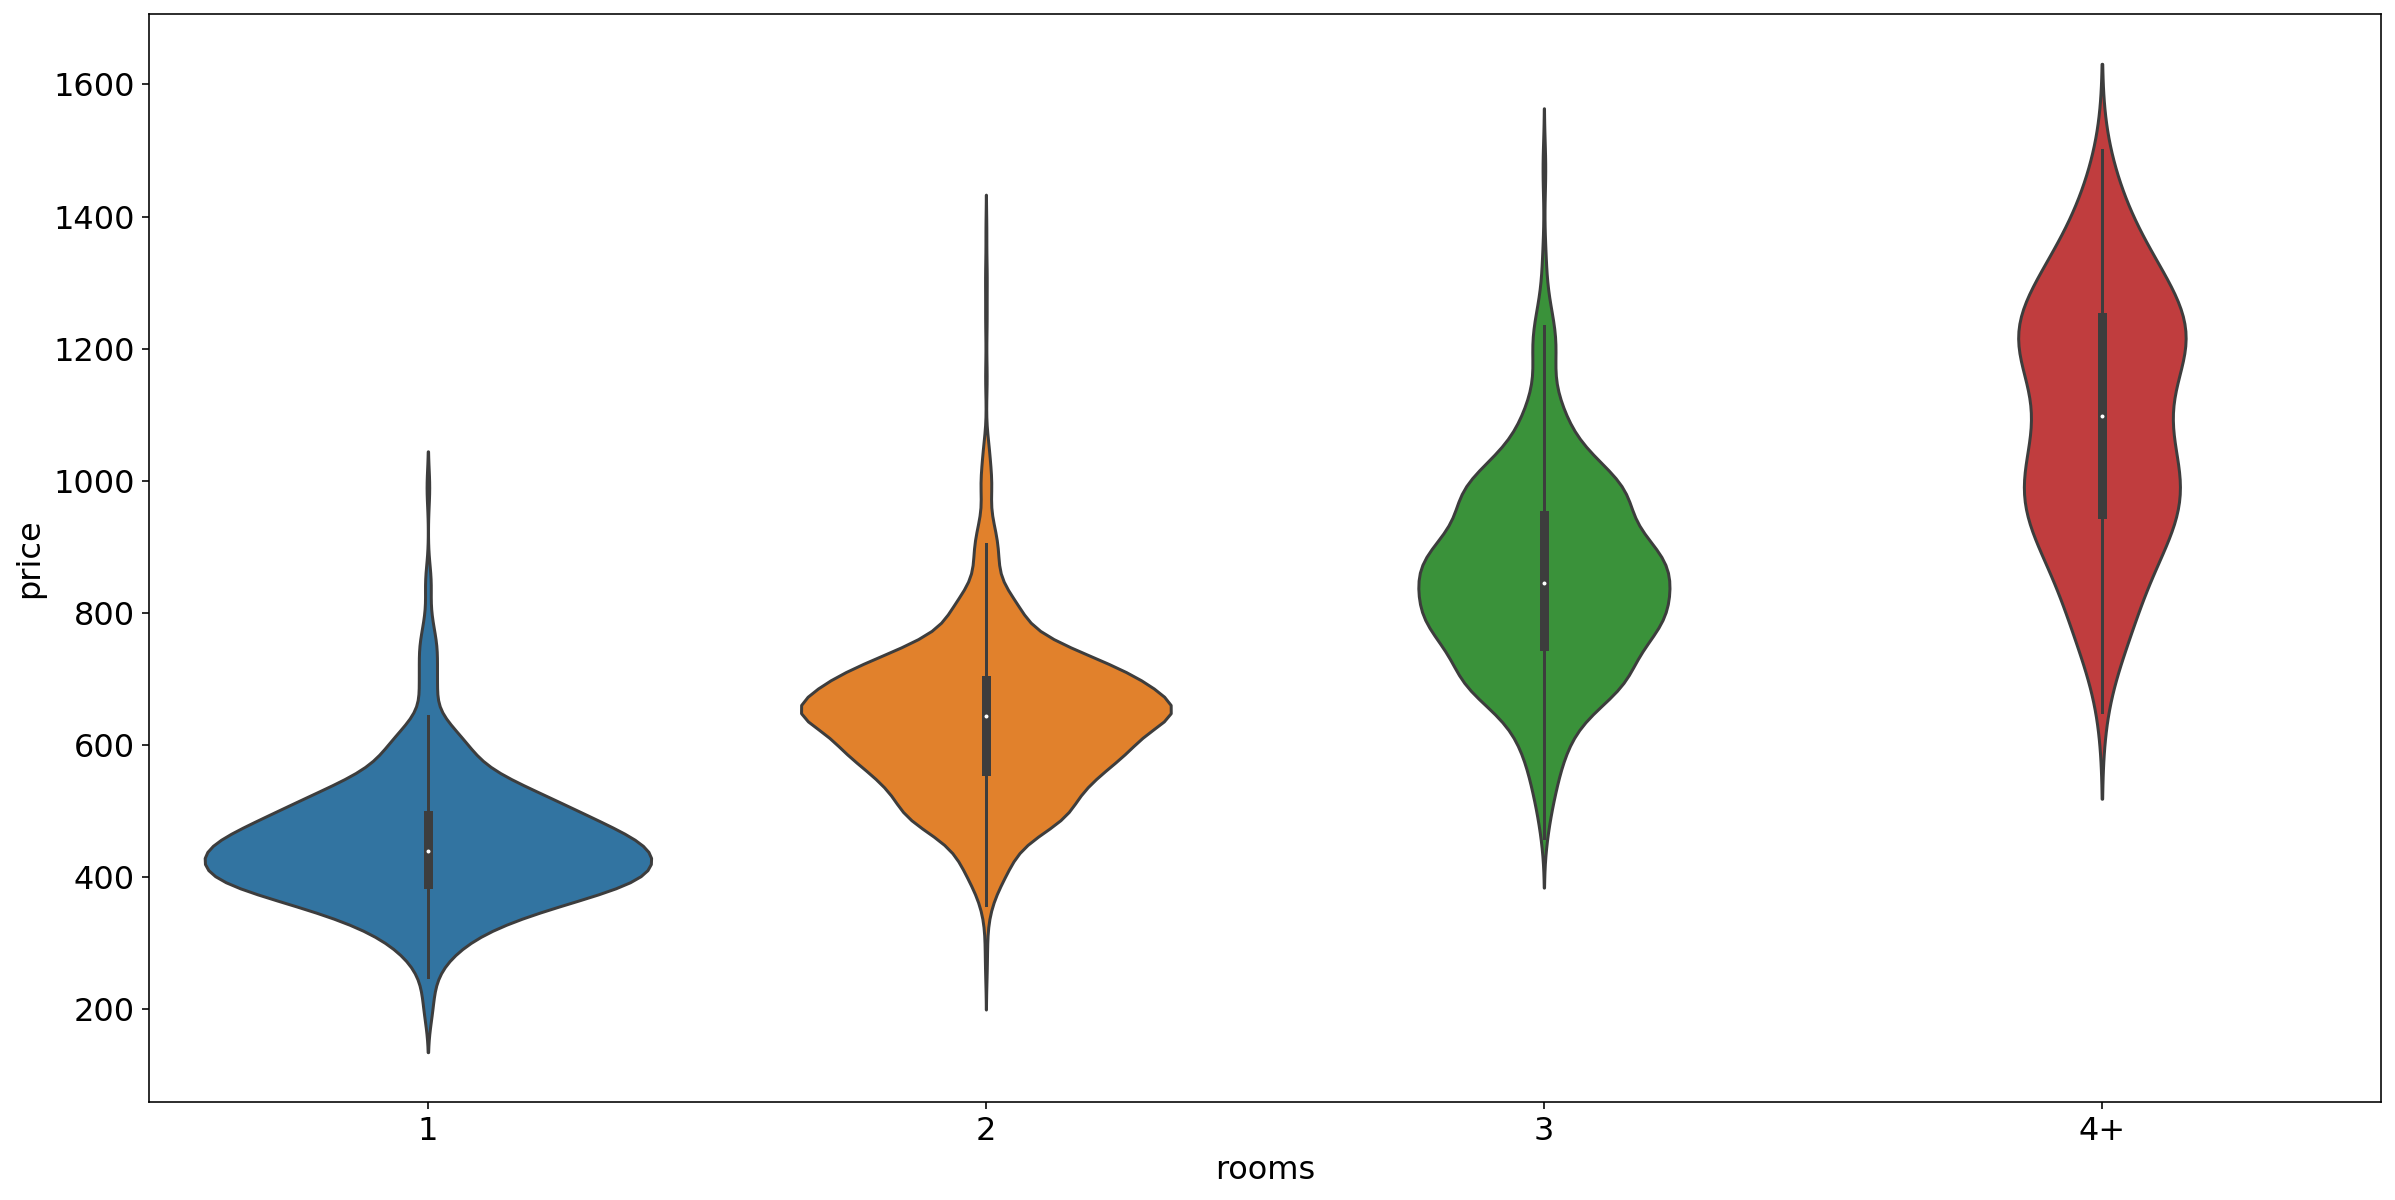

In [58]:
plt.figure(figsize=(20,10))
sns.violinplot(x='rooms', y='price', data=df, order=df.rooms.value_counts().sort_index().index);

### Comparison of private and commercial ads

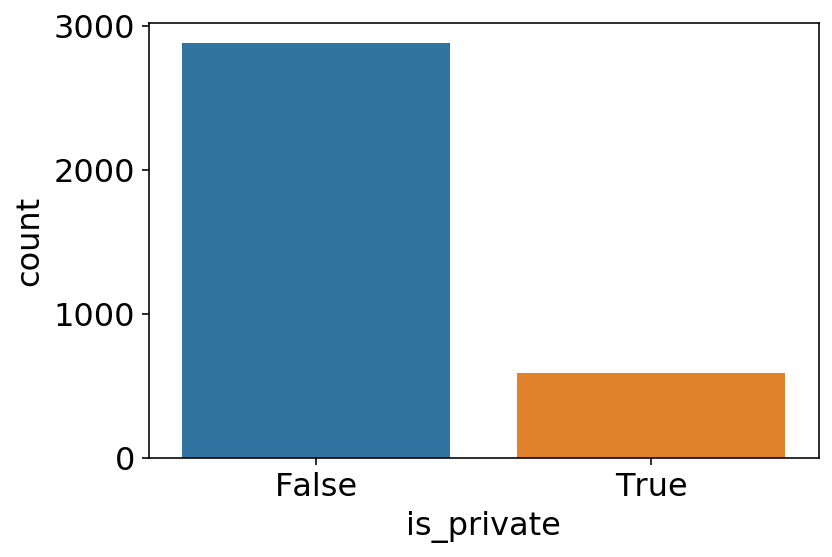

In [59]:
sns.countplot(x='is_private', data=df);

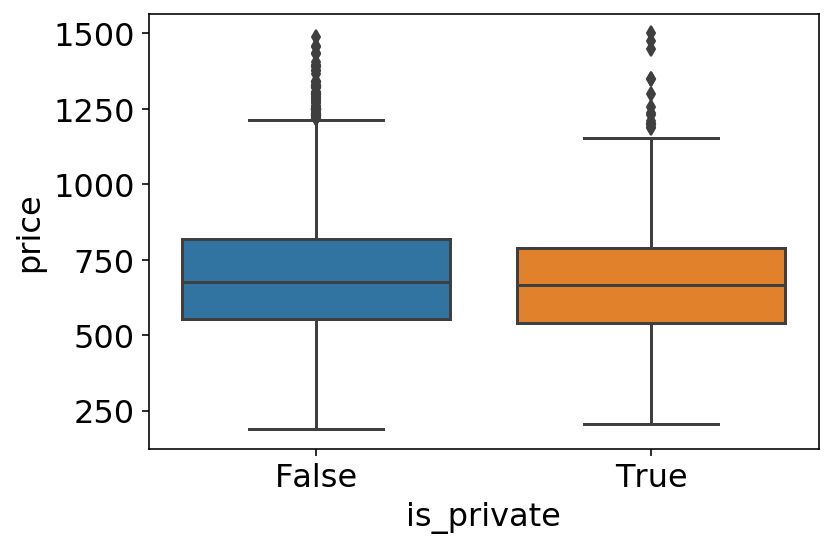

In [60]:
sns.boxplot(x='is_private', y='price', data=df);

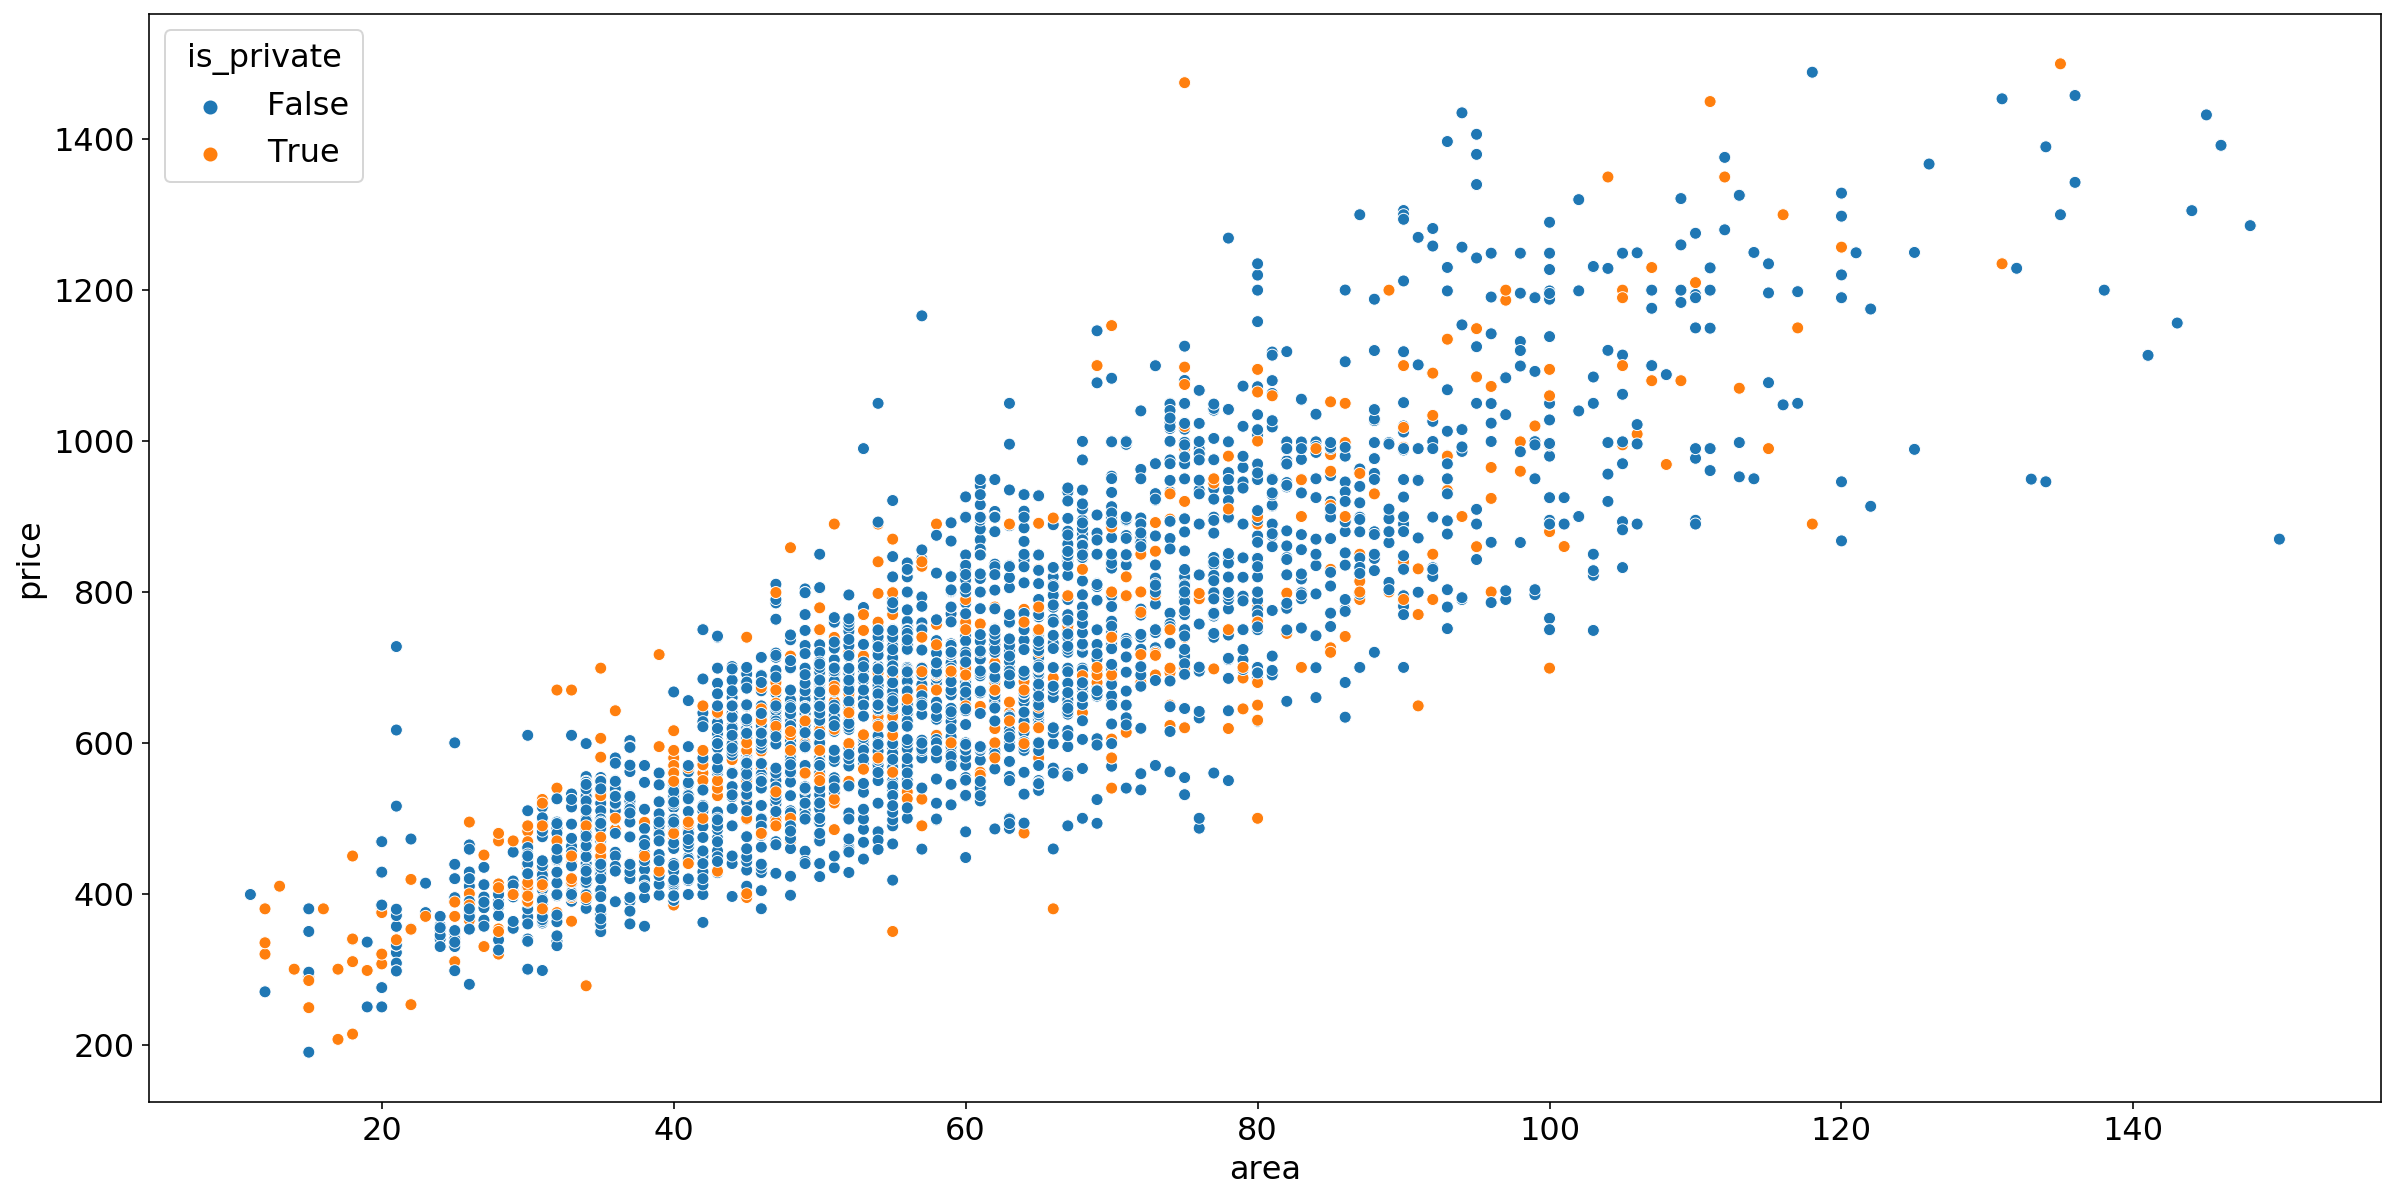

In [61]:
plt.figure(figsize=(20,10));
sns.scatterplot(x='area', y='price', hue='is_private', data=df);

## Linear regression

### Problem
Build a model and predict pricing of the apartment rent in Graz based on data in the ad

### Goals

- Manually write linear regression algorithm
    - Gradient descent function
    - Cost function implementation
    - Normal equation function
    - Feature enumeration and normalization function
- Use libraries and compare it with manual result

### Data description

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Area | Objective Feature | area | float (square meters) |
| Rooms number | Objective Feature | rooms | string  |
| Zip code | Objective Feature | zip | string |
| District | Objective Feature | district | string |
| Is the ad private| Objective Feature | is_private | boolean |
| Is the flat in the city center | Objective Feature | center | boolean |
| Pricing of the ad | Target Variable | price | float |

### Data selection

In [62]:
# We will make a copy of the dataset
X = df.loc[:, ~df.columns.isin(['price', 'advertiser', 'link-href', 'is_private', 'zip', 'district'])]
y = df['price']

In [63]:
X

,area,rooms,center
1,100.0,3,False
2,90.0,3,False
3,21.0,1,True
4,50.0,2,False
5,103.0,3,False
...,...,...,...
3672,53.0,3,False
3673,60.0,3,False
3674,67.0,3,False
3675,105.0,3,True


In [64]:
y.head()

1    996.78
2    700.00
3    322.07
4    671.00
5    749.00
Name: price, dtype: float64

### Categorical features enumeration

In [65]:
def cats_to_codes(df, feature, ordered=None):
    return dict(df[feature].value_counts().astype('category').cat.codes)

In [66]:
def codes_to_cats(feature, code_dict):
    return {value:key for key, value in code_dict.items()}

zip_codes = cats_to_codes(X, 'zip')
X.zip = X.zip.map(zip_codes)

In [67]:
X.head()

,area,rooms,center
1,100.0,3,False
2,90.0,3,False
3,21.0,1,True
4,50.0,2,False
5,103.0,3,False


In [68]:
rooms_codes = cats_to_codes(X, 'rooms')
X.rooms = X.rooms.map(rooms_codes)

/opt/miniconda3/envs/mlenv/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
X.head()

,area,rooms,center
1,100.0,2,False
2,90.0,2,False
3,21.0,1,True
4,50.0,3,False
5,103.0,2,False


district_codes = cats_to_codes(X, 'district')
X.district = X.district.map(district_codes)

In [70]:
#X.is_private = X.is_private.astype('int')
X.center = X.center.astype('int')

/opt/miniconda3/envs/mlenv/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [71]:
X

,area,rooms,center
1,100.0,2,0
2,90.0,2,0
3,21.0,1,1
4,50.0,3,0
5,103.0,2,0
...,...,...,...
3672,53.0,2,0
3673,60.0,2,0
3674,67.0,2,0
3675,105.0,2,1


### Feature normalization

In [72]:
mean_X = np.mean(X)
std_X = np.std(X)

In [73]:
def normalize(x, mean, std):
    return (x - mean)/std

In [74]:
for feat in X.columns:
    X[feat] = (X[feat] - mean_X[feat])/std_X[feat]

<ipython-input-74-3033a60703a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feat] = (X[feat] - mean_X[feat])/std_X[feat]


In [75]:
X

,area,rooms,center
1,1.918100,-0.281292,-0.740279
2,1.443325,-0.281292,-0.740279
3,-1.832624,-1.399363,1.350843
4,-0.455776,0.836779,-0.740279
5,2.060533,-0.281292,-0.740279
...,...,...,...
3672,-0.313343,-0.281292,-0.740279
3673,0.018999,-0.281292,-0.740279
3674,0.351342,-0.281292,-0.740279
3675,2.155488,-0.281292,1.350843


## First hyphotesis
$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + 
\theta_4 x_4 + \theta_5 x_5 + \theta_6 x_6  
$$

### Adding of intercept term x0

In [76]:
X.insert(loc=0, column='x0', value=np.ones(len(X)))

In [77]:
X

,x0,area,rooms,center
1,1.0,1.918100,-0.281292,-0.740279
2,1.0,1.443325,-0.281292,-0.740279
3,1.0,-1.832624,-1.399363,1.350843
4,1.0,-0.455776,0.836779,-0.740279
5,1.0,2.060533,-0.281292,-0.740279
...,...,...,...,...
3672,1.0,-0.313343,-0.281292,-0.740279
3673,1.0,0.018999,-0.281292,-0.740279
3674,1.0,0.351342,-0.281292,-0.740279
3675,1.0,2.155488,-0.281292,1.350843


### Conversion of X and y to numpy arrays 

In [78]:
X = X.to_numpy()
y = y.to_numpy().reshape((-1, 1))

In [79]:
X.shape, y.shape

((3466, 4), (3466, 1))

In [80]:
def computeCost(X, y, theta):
    m = len(y) 
    J = 1/(2*m) * np.sum(np.power(np.subtract(X.dot(theta), y), 2))
    return J

In [81]:
theta = np.zeros((X.shape[1], 1))

In [82]:
theta.shape

(4, 1)

In [83]:
computeCost(X, y, theta)

263974.43644081074

In [84]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta = theta - (alpha/m) * X.T.dot(error)
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [85]:
new_theta, J_history = gradientDescent(X, y, theta, 0.1, 100)

In [86]:
computeCost(X, y, new_theta)

5609.476648950775

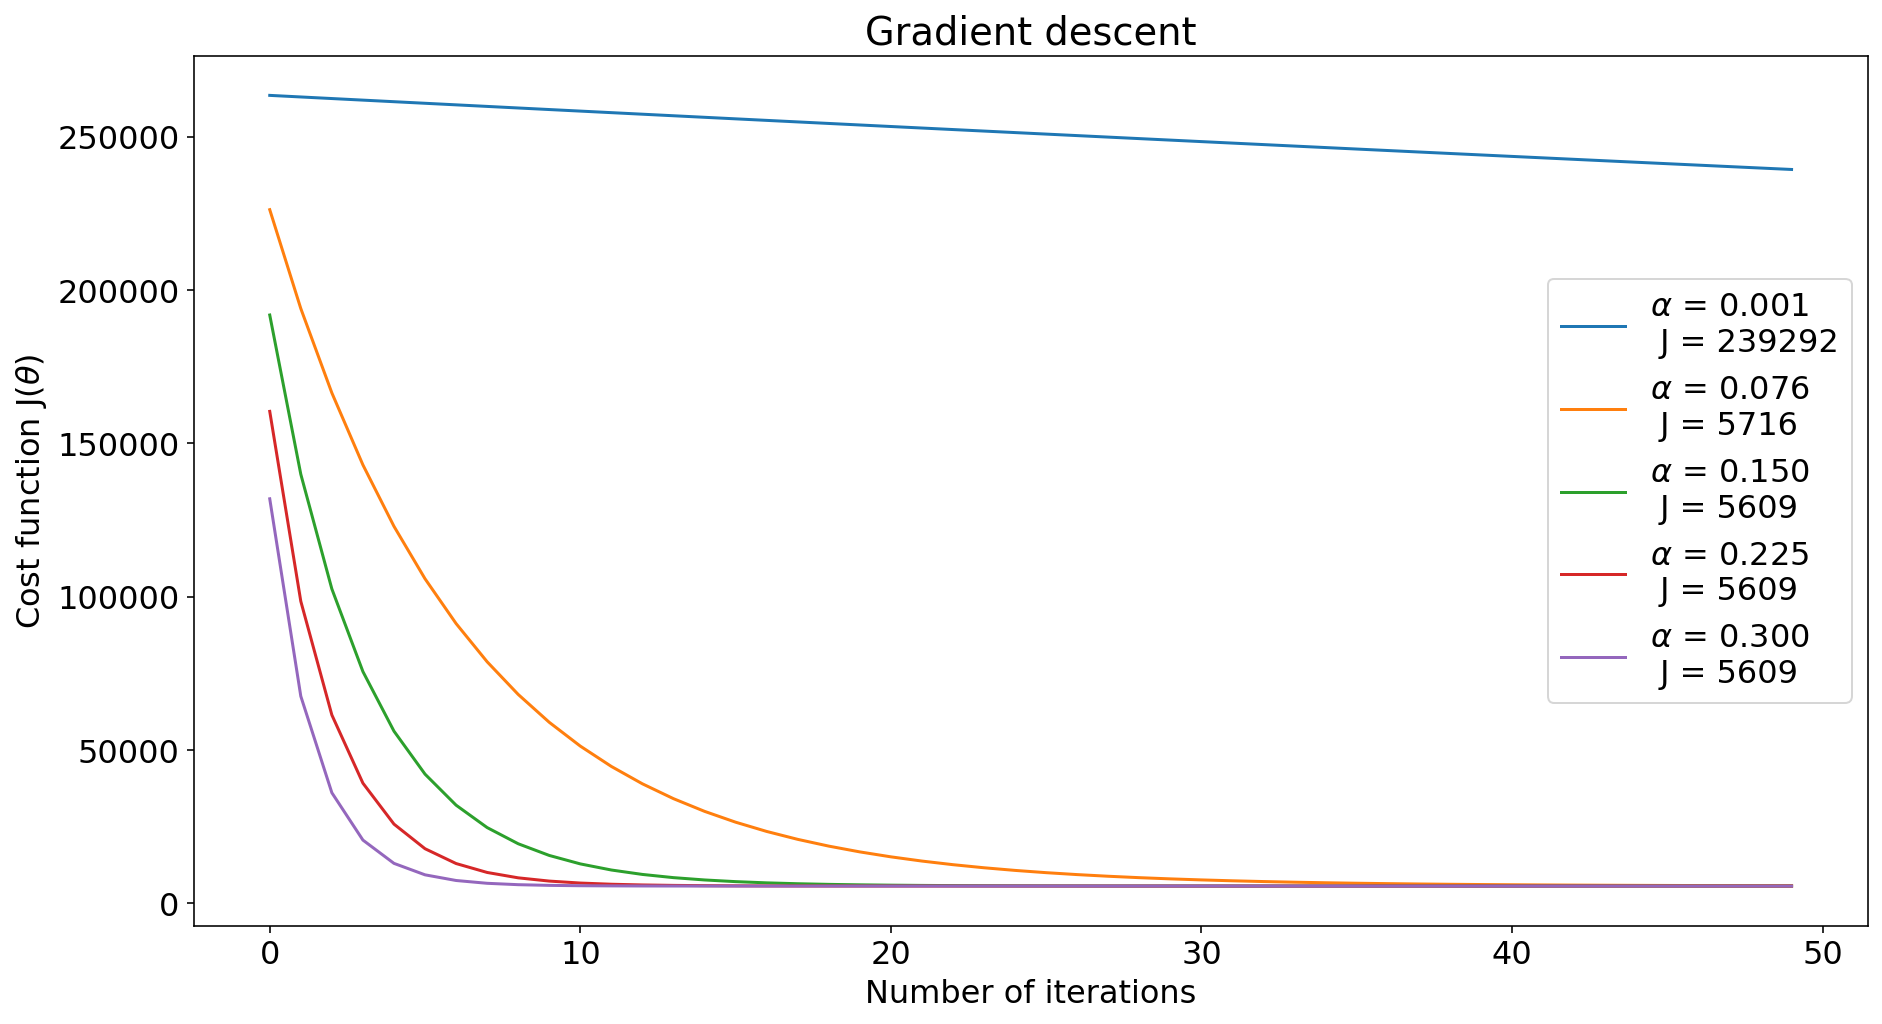

In [87]:
plt.figure(figsize=(15,8));

alphas = np.linspace(0.001, 0.3, 5)
for a in alphas:
    _, J_history = gradientDescent(X, y, theta, a, 50)
    plt.plot(np.arange(J_history.shape[0]), J_history, label=(r'$\alpha$ = {:1.3f}'.format(a) \
                                                              + '\n J = {}'.format(int(J_history[-1][0]))))

plt.legend()
plt.xlabel('Number of iterations');
plt.ylabel(r'Cost function J($\theta$)')
plt.title("Gradient descent");

### Quick test for hyphothesis

In [88]:
new_theta, J_history = gradientDescent(X, y, theta, 0.1, 100)

In [89]:
new_theta

array([[696.47824272],
       [177.69009833],
       [ -4.83151891],
       [ -6.45989967]])

In [90]:
mean_X, std_X

(area      59.599827
 rooms      2.251587
 center     0.354010
 dtype: float64,
 area      21.062597
 rooms      0.894398
 center     0.478212
 dtype: float64)

In [91]:
f = [44, 1, 1]
x = []

for i in range(mean_X.shape[0]):
    x.append(normalize(f[i], mean_X[i], std_X[i]))

In [92]:
x = [1,] + x

In [93]:
x = np.array(x)

In [94]:
new_theta.T.dot(x)

array([562.90837808])

Looks valid

## Model validation

In [96]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [97]:
def predict(X, theta):
    return X.dot(theta)

In [98]:
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

In [99]:
new_theta, _ = gradientDescent(train_X, train_y, theta, 0.1, 100)

In [100]:
val_predictions = predict(val_X, new_theta)

In [101]:
print(val_predictions[:10])

[[ 768.22493417]
 [ 577.35782165]
 [ 851.11817124]
 [ 692.52226332]
 [1014.75103101]
 [ 448.74502025]
 [ 547.08664618]
 [1305.48778157]
 [ 653.0604925 ]
 [ 490.80205961]]


In [102]:
print(val_y[:10])

[[ 895.  ]
 [ 550.  ]
 [ 745.  ]
 [ 728.43]
 [ 999.24]
 [ 400.  ]
 [ 396.5 ]
 [1453.63]
 [ 545.  ]
 [ 495.  ]]


### Calculation of the Mean Absolute Error in Validation Data

In [103]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

In [104]:
val_mae

81.99833975564626

## Normal equation

$$
\theta = (X^T X)^{-1}X^T \bar{y}
$$

In [105]:
def normalEqn(X, y):
    m = len(y)
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [106]:
norm_theta = normalEqn(X, y)

Should be more accurate

In [107]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [108]:
val_predictions = predict(val_X, norm_theta)

In [109]:
val_mae = mean_absolute_error(val_y, val_predictions)
val_mae

81.77967776329322

## Predicting prices usign scikit linear regressor

In [116]:
X

array([[ 1.        ,  1.91810027, -0.28129196, -0.74027867],
       [ 1.        ,  1.44332501, -0.28129196, -0.74027867],
       [ 1.        , -1.83262429, -1.39936299,  1.35084265],
       ...,
       [ 1.        ,  0.35134191, -0.28129196, -0.74027867],
       [ 1.        ,  2.1554879 , -0.28129196,  1.35084265],
       [ 1.        ,  0.01899923,  0.83677907, -0.74027867]])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [111]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False, n_jobs=-1)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

In [112]:
print('Weight coefficients: ', regressor.coef_)

Weight coefficients:  [[697.93071978 177.18853113  -6.41221045  -6.80762635]]


In [113]:
y_pred_train = regressor.predict(X_test)

In [114]:
y_pred_train[0:10]

array([[ 768.27088716],
       [ 577.37337948],
       [ 851.1524518 ],
       [ 692.55862927],
       [1014.82198061],
       [ 448.69995031],
       [ 547.06025391],
       [1305.52904003],
       [ 653.08563736],
       [ 490.76231581]])

In [115]:
val_mae = mean_absolute_error(y_test, y_pred_train)
val_mae

81.99522722251697